## Assignment : 14

<pre>
1. Preprocess all the Data we have in DonorsChoose <a href='https://drive.google.com/drive/folders/1MIwK7BQMev8f5CbDDVNLPaFGB32pFN60'>Dataset</a> use train.csv
2. Combine 4 essay's into one column named - 'preprocessed_essays'. 
3. After step 2 you have to train 3 types of models as discussed below. 
4. For all the model use <a href='https://scikit-learn.org/stable/modules/model_evaluation.html#roc-metrics'>'auc'</a> as a metric. check <a href='https://datascience.stackexchange.com/a/20192'>this</a> for using auc as a metric 
5. You are free to choose any number of layers/hiddden units but you have to use same type of architectures shown below. 
6. You can use any one of the optimizers and choice of Learning rate and momentum, resources: <a href='http://cs231n.github.io/neural-networks-3/'>cs231n class notes</a>, <a href='https://www.youtube.com/watch?v=hd_KFJ5ktUc'>cs231n class video</a>. 
7. For all the model's use <a href='https://www.youtube.com/watch?v=2U6Jl7oqRkM'>TensorBoard</a> and plot the Metric value and Loss with epoch. While submitting, take a screenshot of plots and include those images in .ipynb notebook and PDF. 
8. Use Categorical Cross Entropy as Loss to minimize.
</pre>

### Model-1

Build and Train deep neural network as shown below

<img src='https://i.imgur.com/w395Yk9.png'>
ref: https://i.imgur.com/w395Yk9.png

- __Input_seq_total_text_data__ --- You have to give Total text data columns. After this use the Embedding layer to get word vectors. Use given predefined glove word vectors, don't train any word vectors. After this use LSTM and get the LSTM output and Flatten that output. 
- __Input_school_state__ --- Give 'school_state' column as input to embedding layer and Train the Keras Embedding layer. 
- __Project_grade_category__  --- Give 'project_grade_category' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_clean_categories__ --- Give 'input_clean_categories' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_clean_subcategories__ --- Give 'input_clean_subcategories' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_teacher_prefix__ --- Give 'input_teacher_prefix' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_remaining_teacher_number_of_previously_posted_projects._resource_summary_contains_numerical_digits._price._quantity__ ---concatenate remaining columns and add a Dense layer after that. 



- For LSTM, you can choose your sequence padding methods on your own or you can train your LSTM without padding, there is no restriction on that.

Below is an example of embedding layer for a categorical columns. In below code all are dummy values, we gave only for referance. 

In [3]:
# https://stats.stackexchange.com/questions/270546/how-does-keras-embedding-layer-work
# input_layer = Input(shape=(n,))
# embedding = Embedding(no_1, no_2, input_length=n)(input_layer)
# flatten = Flatten()(embedding)

### 1. Go through this blog, if you have any doubt on using predefined Embedding values in Embedding layer - https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/
### 2. Please go through this link https://keras.io/getting-started/functional-api-guide/ and check the 'Multi-input and multi-output models' then you will get to know how to give multiple inputs. 

### Model-2

Use the same model as above but for 'input_seq_total_text_data' give only some words in the sentance not all the words. Filter the words as below. 

<pre>
1. Train the TF-IDF on the Train data <br>
2. Get the idf value for each word we have in the train data. <br>
3. Remove the low idf value and high idf value words from our data. Do some analysis on the Idf values and based on those values choose the low and high threshold value. Because very frequent words and very very rare words don't give much information. (you can plot a box plots and take only the idf scores within IQR range and corresponding words)<br>
4. Train the LSTM after removing the Low and High idf value words. (In model-1 Train on total data but in Model-2 train on data after removing some words based on IDF values)
</pre>

### Model-3

<img src='https://i.imgur.com/fkQ8nGo.png'>
ref: https://i.imgur.com/fkQ8nGo.png


- __input_seq_total_text_data__: <br>
<pre>
    . Use text column('essay'), and use the Embedding layer to get word vectors. <br>
    . Use given predefined glove word vectors, don't train any word vectors. <br>
    . Use LSTM that is given above, get the LSTM output and Flatten that output. <br>
    . You are free to preprocess the input text as you needed. <br>
</pre>
- __Other_than_text_data__:<br>
<pre>
    . Convert all your Categorical values to onehot coded and then concatenate all these onehot vectors <br>
    . Neumerical values and use <a href='https://keras.io/getting-started/sequential-model-guide/#sequence-classification-with-1d-convolutions'>CNN1D</a> as shown in above figure. <br>
    . You are free to choose all CNN parameters like kernel sizes, stride.<br>
    
</pre>

In [4]:
!pip install keras==2.3.0

     |████████████████████████████████| 378kB 5.5MB/s 
     |████████████████████████████████| 51kB 4.6MB/s 
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3


In [5]:
!pip install --upgrade keras

  Found existing installation: Keras 2.3.0
    Uninstalling Keras-2.3.0:
      Successfully uninstalled Keras-2.3.0


In [1]:
#importing all the required lib
import pandas as pd
import numpy as np 
import os
import math
from collections import defaultdict
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import SpatialDropout1D, LSTM, BatchNormalization,concatenate,Flatten,Embedding,Dense,Dropout,MaxPooling2D,Reshape#,CuDNNLSTM
from keras.models import Sequential
from keras import Model,Input
from keras.layers.convolutional import Conv2D,Conv1D
import keras.backend as k
from sklearn.metrics import roc_auc_score
import tensorflow as tf
import keras
from sklearn.utils import compute_class_weight
from keras.initializers import he_normal,glorot_normal
from keras.regularizers import l1,l2
from keras.callbacks import Callback, EarlyStopping, ModelCheckpoint,LearningRateScheduler
from time import time
from tensorflow.python.keras.callbacks import TensorBoard
from IPython.display import SVG, display
import pickle 
import warnings
warnings.filterwarnings("ignore")
tf.compat.v1.disable_eager_execution()

In [2]:
# create logger instance
# Create a TensorBoard instance with the path to the logs directory
# tensorboard = TensorBoard(log_dir='logs/{}'.format(time()))

In [3]:
# mounted my Google Drive in colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
# from google.colab import drive
# drive.flush_and_unmount()

In [4]:
# Check ls command
!ls "/content/drive/My Drive/test"

Electricityforecasting.xlsx  model_1.png	    test_data.csv
FINHACK			     model_2.png	    train_data.csv
glove.42B.300d.txt	     model_3.png	    VehicleForecasting.xlsx
glove_vectors		     preprocessed_data.csv
logs			     resources.csv


In [5]:
!ls "/content/drive/My Drive/test"

Electricityforecasting.xlsx  model_1.png	    test_data.csv
FINHACK			     model_2.png	    train_data.csv
glove.42B.300d.txt	     model_3.png	    VehicleForecasting.xlsx
glove_vectors		     preprocessed_data.csv
logs			     resources.csv


In [6]:
glovevectorfile = open('/content/drive/My Drive/test/glove_vectors', 'rb')
glovevector = pickle.load(glovevectorfile)

In [7]:
glovevector['respirometer'].shape

(300,)

In [8]:
glovevector['respirometer']

array([-0.26498  , -0.35035  ,  0.094222 , -0.11979  , -0.61102  ,
       -0.19592  ,  0.45899  ,  0.13644  , -0.021064 ,  0.078949 ,
        0.30338  , -0.53602  , -0.1295   , -0.059114 , -0.26958  ,
       -0.0594   , -0.30946  ,  0.24687  , -0.21573  , -0.065925 ,
        0.20449  , -0.30173  , -0.044619 , -0.57615  , -0.5174   ,
        0.34105  ,  0.051588 ,  0.14976  , -0.062579 , -0.23767  ,
        0.047176 ,  0.042792 , -0.42746  , -0.16878  ,  0.0021385,
       -0.010016 ,  0.34403  , -0.1048   ,  0.069748 , -0.01309  ,
        0.0051577, -0.49232  , -0.098993 ,  0.30827  ,  0.15935  ,
       -0.24144  , -0.53102  ,  0.039552 ,  0.22399  ,  0.36858  ,
        0.12315  , -0.22694  ,  0.64236  , -0.17091  ,  0.34865  ,
        0.13089  , -0.053819 ,  0.04895  , -0.24464  ,  0.43476  ,
        0.2408   ,  0.181    , -0.2394   ,  0.072814 ,  0.55916  ,
        0.10483  , -0.19562  , -0.061841 , -0.015999 , -0.038759 ,
        0.31525  , -0.36021  , -0.49485  , -0.33829  , -0.2936

In [15]:
# load pre-processed file
project_data = pd.read_csv('/content/drive/My Drive/test/preprocessed_data.csv')
project_data.shape

(109248, 9)

In [16]:
project_data.head(2)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,1,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03


In [17]:
project_data['remaining_input'] = project_data['teacher_number_of_previously_posted_projects'] + project_data['price']

In [18]:
project_data.head(2)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price,remaining_input
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05,778.05
1,ut,ms,grades_3_5,4,1,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03,217.03


In [19]:
project_data.tail(2)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price,remaining_input
109246,hi,mrs,grades_9_12,1,1,math_science,health_lifescience,i teach many different types students my class...,287.73,288.73
109247,ca,mrs,grades_prek_2,2,1,literacy_language,literacy literature_writing,my first graders eager learn world around they...,5.50,7.50


- <h2>Process following categorical features</h2>


- __Input_seq_total_text_data__ --- You have to give Total text data columns. After this use the Embedding layer to get word vectors. Use given predefined glove word vectors, don't train any word vectors. After this use LSTM and get the LSTM output and Flatten that output. 
- __Input_school_state__ --- Give 'school_state' column as input to embedding layer and Train the Keras Embedding layer. 
- __Project_grade_category__  --- Give 'project_grade_category' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_clean_categories__ --- Give 'input_clean_categories' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_clean_subcategories__ --- Give 'input_clean_subcategories' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_teacher_prefix__ --- Give 'input_teacher_prefix' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_remaining_teacher_number_of_previously_posted_projects._resource_summary_contains_numerical_digits._price._quantity__ ---concatenate remaining columns and add a Dense layer after that. 



In [20]:
# identify distinct values in school_state
print(project_data['school_state'].describe())
print(project_data['school_state'].unique())

count     109248
unique        51
top           ca
freq       15388
Name: school_state, dtype: object
['ca' 'ut' 'ga' 'wa' 'hi' 'il' 'oh' 'ky' 'sc' 'fl' 'mo' 'mi' 'ny' 'va'
 'md' 'tx' 'ms' 'nj' 'az' 'ok' 'pa' 'wv' 'nc' 'co' 'dc' 'ma' 'id' 'al'
 'me' 'tn' 'in' 'la' 'ct' 'ar' 'ks' 'or' 'wi' 'ia' 'sd' 'ak' 'mn' 'nm'
 'nv' 'mt' 'ri' 'nh' 'wy' 'ne' 'de' 'nd' 'vt']


In [21]:
# identify distinct values in project_grade_category
print(project_data['project_grade_category'].describe())
print(project_data['project_grade_category'].unique())

count            109248
unique                4
top       grades_prek_2
freq              44225
Name: project_grade_category, dtype: object
['grades_prek_2' 'grades_3_5' 'grades_9_12' 'grades_6_8']


In [22]:
# identify distinct values in clean_categories
print(project_data['clean_categories'].describe())
print(project_data['clean_categories'].unique())

count                109248
unique                   51
top       literacy_language
freq                  23655
Name: clean_categories, dtype: object
['math_science' 'specialneeds' 'literacy_language' 'appliedlearning'
 'math_science history_civics' 'literacy_language math_science'
 'appliedlearning music_arts' 'math_science appliedlearning'
 'math_science literacy_language' 'history_civics literacy_language'
 'appliedlearning health_sports' 'math_science music_arts'
 'appliedlearning literacy_language' 'music_arts' 'health_sports'
 'literacy_language specialneeds' 'math_science specialneeds'
 'appliedlearning history_civics' 'appliedlearning specialneeds'
 'health_sports literacy_language' 'literacy_language music_arts'
 'history_civics math_science' 'specialneeds health_sports'
 'literacy_language history_civics' 'health_sports specialneeds'
 'history_civics music_arts' 'math_science health_sports'
 'music_arts specialneeds' 'specialneeds music_arts'
 'health_sports history_civics' '

In [23]:
# identify distinct values in clean_subcategories
print(project_data['clean_subcategories'].describe())
print(project_data['clean_subcategories'].unique())

count       109248
unique         401
top       literacy
freq          9486
Name: clean_subcategories, dtype: object
['appliedsciences health_lifescience' 'specialneeds' 'literacy'
 'earlydevelopment' 'mathematics socialsciences' 'literacy mathematics'
 'appliedsciences history_geography' 'esl literacy'
 'appliedsciences mathematics' 'extracurricular visualarts'
 'appliedsciences earlydevelopment' 'environmentalscience literacy'
 'appliedsciences environmentalscience'
 'history_geography literature_writing' 'literacy literature_writing'
 'earlydevelopment gym_fitness' 'environmentalscience visualarts'
 'environmentalscience mathematics' 'appliedsciences visualarts'
 'earlydevelopment literacy' 'music' 'teamsports'
 'health_lifescience mathematics' 'music performingarts'
 'esl environmentalscience' 'college_careerprep esl'
 'appliedsciences other' 'college_careerprep visualarts'
 'literature_writing specialneeds' 'health_lifescience specialneeds'
 'environmentalscience literature_writin

In [24]:
# identify distinct values in teacher_prefix
project_data['teacher_prefix'].describe()
project_data['teacher_prefix'].values

array(['mrs', 'ms', 'mrs', ..., 'mrs', 'mrs', 'mrs'], dtype=object)

In [25]:
# droping class label data
y = project_data['project_is_approved'].values
project_data.drop(['project_is_approved'], axis=1, inplace=True)
X = project_data
project_data.shape

(109248, 9)

In [26]:
# Split Train, CV and Test data (64, 16, 20)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train)

print('Train Data Set', X_train.shape, y_train.shape)
print('Cross Validate Data Set', X_cv.shape, y_cv.shape)
print('Test Data Set', X_test.shape, y_test.shape)

Train Data Set (69918, 9) (69918,)
Cross Validate Data Set (17480, 9) (17480,)
Test Data Set (21850, 9) (21850,)


In [27]:
print('Train Data Set', X_train.shape, y_train.shape)
print('Cross Validate Data Set', X_cv.shape, y_cv.shape)
print('Test Data Set', X_test.shape, y_test.shape)
print('*'*100)

Train Data Set (69918, 9) (69918,)
Cross Validate Data Set (17480, 9) (17480,)
Test Data Set (21850, 9) (21850,)
****************************************************************************************************


In [28]:
# build logic to tokenize input
# Steps below
# 1. Count frequencies of each word
# 2. Sort frequencies by desc order
# 3. Assign rank to frequencies
# 4. Tokenize words in the main categorical variable
sent_list = [
    'The phone is very fast',
    'The phone is not bad',
    'I have good phone',
]

# count no. of words and assign it to dictionary
words_dict = {}
for sent in sent_list:
    words = sent.split()
    for i in words:
        if(i in words_dict):
            words_dict[i] += 1
        else:
            words_dict[i] = 1
            
print(words_dict)
print('*'*100)

# sort dictionary by their frequencies
sorted_dict = sorted(words_dict.items(), key=lambda x: x[1], reverse=True)
print(sorted_dict)
print('*'*100)


# assign rank to each word
rank = 1
final_dict = {} 
for item in sorted_dict:
    item = list(item)
    final_dict[item[0]] = rank
    rank += 1
    
print(final_dict)
print('*'*100)

# finally convert main sentences into tokens
tokenize_list = []
for sent in sent_list:
    words = sent.split()
    tokenize_sublist = []
    for item in words:
        if(item in final_dict):
            tokenize_sublist.append(final_dict[item])
    
    tokenize_list.append(tokenize_sublist)
        
print(tokenize_list)
print('*'*100)

{'The': 2, 'phone': 3, 'is': 2, 'very': 1, 'fast': 1, 'not': 1, 'bad': 1, 'I': 1, 'have': 1, 'good': 1}
****************************************************************************************************
[('phone', 3), ('The', 2), ('is', 2), ('very', 1), ('fast', 1), ('not', 1), ('bad', 1), ('I', 1), ('have', 1), ('good', 1)]
****************************************************************************************************
{'phone': 1, 'The': 2, 'is': 3, 'very': 4, 'fast': 5, 'not': 6, 'bad': 7, 'I': 8, 'have': 9, 'good': 10}
****************************************************************************************************
[[2, 1, 3, 4, 5], [2, 1, 3, 6, 7], [8, 9, 10, 1]]
****************************************************************************************************


In [29]:
def fit_transform_train_data(train_data):
    bag_of_words = CountVectorizer(lowercase= False)
    bow_words = bag_of_words.fit_transform(train_data)
    
    # Store calculated frequencies in the dictionaries
    freqs = bow_words.sum(axis=0).A1
    index = freqs.argsort()
    words = bag_of_words.get_feature_names()
    # print(freqs, index, words)
    
    rank_dict = {}
    rank = 1
    for item in index[::-1]:
        feature_name = words[item]
        rank_dict[feature_name] = rank
        rank += 1
        
    # print(rank_dict)
    
    return [words, rank_dict]


def transform_data(data, rank_dict):
    # finally convert main sentences into tokens
    tokenize_list = []
    for sent in data:
        words = sent.split()
        tokenize_sublist = []
        for item in words:
            if(item in rank_dict):
                tokenize_sublist.append(rank_dict[item])

        tokenize_list.append(tokenize_sublist)
        
        
    return tokenize_list

In [30]:
# Test above implementation
features, rank_dict = fit_transform_train_data(project_data['school_state'])
print(features, rank_dict)
tokenize_data = transform_data(project_data['school_state'], rank_dict)
print(project_data['school_state'][0])
print(tokenize_data[0])
print(project_data['school_state'][10])
print(tokenize_data[10])
print(len(features))

['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy'] {'ca': 1, 'tx': 2, 'ny': 3, 'fl': 4, 'nc': 5, 'il': 6, 'ga': 7, 'sc': 8, 'mi': 9, 'pa': 10, 'in': 11, 'mo': 12, 'oh': 13, 'la': 14, 'ma': 15, 'wa': 16, 'ok': 17, 'nj': 18, 'az': 19, 'va': 20, 'wi': 21, 'al': 22, 'ut': 23, 'tn': 24, 'ct': 25, 'md': 26, 'nv': 27, 'ms': 28, 'ky': 29, 'or': 30, 'mn': 31, 'co': 32, 'ar': 33, 'id': 34, 'ia': 35, 'ks': 36, 'nm': 37, 'dc': 38, 'hi': 39, 'me': 40, 'wv': 41, 'nh': 42, 'ak': 43, 'de': 44, 'ne': 45, 'sd': 46, 'ri': 47, 'mt': 48, 'nd': 49, 'wy': 50, 'vt': 51}
ca
[1]
il
[6]
51


In [31]:
# One hot encoding of Categorical Feature
# - school_state : categorical data
(school_state_features, rank_dict) = fit_transform_train_data(X_train['school_state'].values)# Fit has to happen only on train data

X_train_school_state_ohe = transform_data(X_train['school_state'].values, rank_dict)
X_cv_school_state_ohe = transform_data(X_cv['school_state'].values, rank_dict)
X_test_school_state_ohe = transform_data(X_test['school_state'].values, rank_dict)

print(len(X_train_school_state_ohe), y_train.shape)
print(len(X_cv_school_state_ohe), y_cv.shape)
print(len(X_test_school_state_ohe), y_test.shape)
print(school_state_features)
print(len(school_state_features))
print('*'*100)

69918 (69918,)
17480 (17480,)
21850 (21850,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']
51
****************************************************************************************************


In [32]:
# print(X_train['project_grade_category'])
# One hot encoding of Categorical Feature
# - project_grade_category : categorical data
# Convert one hot encoding for project grade category
(project_grade_category_features, rank_dict) =  fit_transform_train_data(X_train['project_grade_category'].values)# Fit has to happen only on train data

X_train_project_grade_category_ohe = transform_data(X_train['project_grade_category'].values, rank_dict)
X_cv_project_grade_category_ohe = transform_data(X_cv['project_grade_category'].values, rank_dict)
X_test_project_grade_category_ohe = transform_data(X_test['project_grade_category'].values, rank_dict)

print(len(X_train_project_grade_category_ohe), y_train.shape)
print(len(X_cv_project_grade_category_ohe), y_cv.shape)
print(len(X_test_project_grade_category_ohe), y_test.shape)
# print(project_grade_category_features)
print(len(project_grade_category_features))
print('*'*100)

69918 (69918,)
17480 (17480,)
21850 (21850,)
4
****************************************************************************************************


In [33]:
# One hot encoding of Categorical Feature
# - clean_categories : categorical data
# print(X_train['clean_categories'].describe())
(clean_categories_features, rank_dict) =  fit_transform_train_data(X_train['clean_categories'].values)# Fit has to happen only on train data

# print(rank_dict)

X_train_clean_categories_ohe = transform_data(X_train['clean_categories'].values, rank_dict)
X_cv_clean_categories_ohe = transform_data(X_cv['clean_categories'].values, rank_dict)
X_test_clean_categories_ohe = transform_data(X_test['clean_categories'].values, rank_dict)

print(len(X_train_clean_categories_ohe), y_train.shape)
print(len(X_cv_clean_categories_ohe), y_cv.shape)
print(len(X_test_clean_categories_ohe), y_test.shape)
print(clean_categories_features)
print(len(clean_categories_features))
print('*'*100)

69918 (69918,)
17480 (17480,)
21850 (21850,)
['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']
9
****************************************************************************************************


In [34]:
# One hot encoding of Categorical Feature
# - clean_subcategories : categorical data
(clean_subcategories_features, rank_dict) =  fit_transform_train_data(X_train['clean_subcategories'].values)# Fit has to happen only on train data

X_train_clean_subcategories_ohe = transform_data(X_train['clean_subcategories'].values, rank_dict)
X_cv_clean_subcategories_ohe = transform_data(X_cv['clean_subcategories'].values, rank_dict)
X_test_clean_subcategories_ohe = transform_data(X_test['clean_subcategories'].values, rank_dict)

print(len(X_train_clean_subcategories_ohe), y_train.shape)
print(len(X_cv_clean_subcategories_ohe), y_cv.shape)
print(len(X_test_clean_subcategories_ohe), y_test.shape)
print(clean_subcategories_features)
print(len(clean_subcategories_features))
print('*'*100)

69918 (69918,)
17480 (17480,)
21850 (21850,)
['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth']
30
****************************************************************************************************


In [35]:
# One hot encoding of Categorical Feature
# - teacher_prefix : categorical data
# print(X_train['teacher_prefix'])
(teacher_prefix_features, rank_dict) =  fit_transform_train_data(X_train['teacher_prefix'].values)# Fit has to happen only on train data

X_train_teacher_prefix_ohe = transform_data(X_train['teacher_prefix'].values, rank_dict)
X_cv_teacher_prefix_ohe = transform_data(X_cv['teacher_prefix'].values, rank_dict)
X_test_teacher_prefix_ohe = transform_data(X_test['teacher_prefix'].values, rank_dict)

print(len(X_train_teacher_prefix_ohe), y_train.shape)
print(len(X_cv_teacher_prefix_ohe), y_cv.shape)
print(len(X_test_teacher_prefix_ohe), y_test.shape)
print(teacher_prefix_features)
print(len(teacher_prefix_features))
print('*'*100)

69918 (69918,)
17480 (17480,)
21850 (21850,)
['dr', 'mr', 'mrs', 'ms', 'teacher']
5
****************************************************************************************************


In [36]:
# # convert review word as well i.e. tokenize review text
# # - text : text data
# print(X_train.shape, y_train.shape)
# print(X_cv.shape, y_cv.shape)
# print(X_test.shape, y_test.shape)

# print("*"*100)

# (easy_features, rank_dict)  = fit_transform_train_data(X_train['essay'].values) # fit has to happen only on train data

# # we use the fitted CountVectorizer to convert the text to vector
# X_train_essay = transform_data(X_train['essay'].values, rank_dict)
# X_cv_essay = transform_data(X_cv['essay'].values, rank_dict)
# X_test_essay = transform_data(X_test['essay'].values, rank_dict)

# print("After vectorizations")
# print(len(X_train_essay), y_train.shape)
# print(len(X_cv_essay), y_cv.shape)
# print(len(X_test_essay), y_test.shape)
# # print(easy_features)
# print(len(easy_features))
# print("*"*100)

In [37]:
#https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/
def padded(encoded_docs):  
  max_length = 250
  padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
  return padded_docs

In [38]:
#https://stackoverflow.com/posts/51956230/revisions
t = Tokenizer()
t.fit_on_texts(X_train['essay'])
vocab_size = len(t.word_index) + 1
# integer encode the documents
encoded_docs = t.texts_to_sequences(X_train['essay'])
X_train_essay = padded(encoded_docs)

In [39]:
#t = Tokenizer()
#t.fit_on_texts(x_cross.cleaned_essay)
#vocab_size = len(t.word_index) + 1
# integer encode the documents
encoded_docs = t.texts_to_sequences(X_cv['essay'])
X_cv_essay = padded(encoded_docs)

In [40]:
#t = Tokenizer()
#t.fit_on_texts(x_test.cleaned_essay)
#vocab_size = len(t.word_index) + 1
# integer encode the documents
encoded_docs = t.texts_to_sequences(X_test['essay'])
X_test_essay = padded(encoded_docs)

In [41]:
embeddings_index = dict()
f = open('/content/drive/My Drive/test/glove.42B.300d.txt')
for line in f:
	values = line.split()
	word = values[0]
	coefs = np.asarray(values[1:], dtype='float32')
	embeddings_index[word] = coefs
f.close()

In [42]:
embedding_matrix = np.zeros((vocab_size, 300))
for word, i in t.word_index.items():
	embedding_vector = embeddings_index.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector

In [43]:
print("embedding matrix shape",embedding_matrix.shape)

embedding matrix shape (47445, 300)


In [44]:
#converting class labels to categorical variables
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_cv = to_categorical(y_cv)
y_test = to_categorical(y_test)

In [45]:
y_train

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [46]:
class_weight = compute_class_weight("balanced", classes= np.unique(y),y=y)

In [47]:
class_weight

array([3.30214001, 0.58921753])

<h1>Sequence Padding Text Data</h1>

In [48]:
# #padding zeros at the begining of each easy to make max len as 250
# max_easy_length = 250
# X_train_essay = pad_sequences(X_train_essay, maxlen=max_easy_length)
# X_cv_essay = pad_sequences(X_cv_essay, maxlen=max_easy_length)
# X_test_essay = pad_sequences(X_test_essay, maxlen=max_easy_length)
# print(X_train_essay.shape)
# print(X_train_essay[0])
# print(X_train_essay[1])
# print(X_cv_essay.shape)
# print(X_cv_essay[0])
# # print(X_cv_essay[1])
# print(X_test_essay.shape)
# print(X_test_essay[0])
# # print(X_test_essay[1])

In [49]:
max_length_categorical_variable = 1

In [50]:
# X_train_school_state_ohe

In [51]:
X_train_school_state_ohe = pad_sequences(X_train_school_state_ohe, maxlen=max_length_categorical_variable)
X_cv_school_state_ohe = pad_sequences(X_cv_school_state_ohe, maxlen=max_length_categorical_variable)
X_test_school_state_ohe = pad_sequences(X_test_school_state_ohe, maxlen=max_length_categorical_variable)
print(X_train_school_state_ohe.shape)
print(X_train_school_state_ohe[0])
print(X_train_school_state_ohe[1])
print(X_cv_school_state_ohe.shape)
print(X_cv_school_state_ohe[0])
print(X_test_school_state_ohe.shape)
print(X_test_school_state_ohe[0])

(69918, 1)
[2]
[1]
(17480, 1)
[17]
(21850, 1)
[16]


In [52]:
X_train_project_grade_category_ohe = pad_sequences(X_train_project_grade_category_ohe, maxlen=max_length_categorical_variable)
X_cv_project_grade_category_ohe = pad_sequences(X_cv_project_grade_category_ohe, maxlen=max_length_categorical_variable)
X_test_project_grade_category_ohe = pad_sequences(X_test_project_grade_category_ohe, maxlen=max_length_categorical_variable)
print(X_train_project_grade_category_ohe.shape)
print(X_train_project_grade_category_ohe[0])
print(X_train_project_grade_category_ohe[1])
print(X_cv_project_grade_category_ohe.shape)
print(X_cv_project_grade_category_ohe[0])
print(X_test_school_state_ohe.shape)
print(X_test_school_state_ohe[0])

(69918, 1)
[1]
[1]
(17480, 1)
[1]
(21850, 1)
[16]


In [53]:
X_train_clean_categories_ohe = pad_sequences(X_train_clean_categories_ohe, maxlen=max_length_categorical_variable)
X_cv_clean_categories_ohe = pad_sequences(X_cv_clean_categories_ohe, maxlen=max_length_categorical_variable)
X_test_clean_categories_ohe = pad_sequences(X_test_clean_categories_ohe, maxlen=max_length_categorical_variable)
print(X_train_clean_categories_ohe.shape)
print(X_train_clean_categories_ohe[0])
print(X_train_clean_categories_ohe[1])
print(X_cv_clean_categories_ohe.shape)
print(X_cv_clean_categories_ohe[0])
print(X_test_clean_categories_ohe.shape)
print(X_test_clean_categories_ohe[0])

(69918, 1)
[2]
[1]
(17480, 1)
[2]
(21850, 1)
[2]


In [54]:
X_train_clean_subcategories_ohe = pad_sequences(X_train_clean_subcategories_ohe, maxlen=max_length_categorical_variable)
X_cv_clean_subcategories_ohe = pad_sequences(X_cv_clean_subcategories_ohe, maxlen=max_length_categorical_variable)
X_test_clean_subcategories_ohe = pad_sequences(X_test_clean_subcategories_ohe, maxlen=max_length_categorical_variable)
print(X_train_clean_subcategories_ohe.shape)
print(X_train_clean_subcategories_ohe[0])
print(X_train_clean_subcategories_ohe[1])
print(X_cv_clean_subcategories_ohe.shape)
print(X_cv_clean_subcategories_ohe[0])
print(X_test_clean_subcategories_ohe.shape)
print(X_test_clean_subcategories_ohe[0])

(69918, 1)
[2]
[3]
(17480, 1)
[2]
(21850, 1)
[2]


In [55]:
X_train_teacher_prefix_ohe = pad_sequences(X_train_teacher_prefix_ohe, maxlen=max_length_categorical_variable)
X_cv_teacher_prefix_ohe = pad_sequences(X_cv_teacher_prefix_ohe, maxlen=max_length_categorical_variable)
X_test_teacher_prefix_ohe = pad_sequences(X_test_teacher_prefix_ohe, maxlen=max_length_categorical_variable)
print(X_train_teacher_prefix_ohe.shape)
print(X_train_teacher_prefix_ohe[0])
print(X_train_teacher_prefix_ohe[1])
print(X_cv_teacher_prefix_ohe.shape)
print(X_cv_teacher_prefix_ohe[0])
print(X_test_teacher_prefix_ohe.shape)
print(X_test_teacher_prefix_ohe[0])

(69918, 1)
[1]
[2]
(17480, 1)
[2]
(21850, 1)
[2]


In [56]:
#AUC score
def auc( y_true, y_pred ) :
    score = tf.numpy_function( lambda y_true, y_pred : roc_auc_score( y_true, y_pred, average='macro', sample_weight=None).astype('float32'),
                        [y_true, y_pred],
                        'float32',
                        stateful=True,
                        name='sklearnAUC' )
    return score

# def auc(y_true, y_pred):
#   return tf.py_func(roc_auc_score, (y_true, y_pred), tf.double)
# model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy',auc])
# model.fit(...,validation_A=(x_val,y_val),..,batch_size=300)

In [57]:
# #Creating a matrix with rows as words and columns with 300 dim vectors for each word
# def embedding_mat(word_index, embedding_dim = 300):
#     embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))
#     # initialize counter
#     cnt = 0
#     for i, sent in word_index.items():
#         vector = np.zeros(embedding_dim) # as word vectors are of zero length
#         words = sent.split()
#         for word in words:
#           # check word in glove vector
#           embedding_vector = glovevector.get(word)
#           if embedding_vector is not None:
#             #sum words weights
#             vector += embedding_vector

#         # words not found in embedding index will be all-zeros.
#         embedding_matrix[cnt] = vector
#         cnt += 1

#     return embedding_matrix

In [58]:
# X_train_essay_mat = embedding_mat(X_train['essay'])
# X_train_essay_mat.shape

In [59]:
X_train_essay_mat = embedding_matrix

<h1>Assignment 1</h1>

- input_dim: This is the size of the vocabulary in the text data. For example, if your data is integer encoded to values between 0-10, then the size of the vocabulary would be 11 words.
- output_dim: This is the size of the vector space in which words will be embedded. It defines the size of the output vectors from this layer for each word. For example, it could be 32 or 100 or even larger. Test different values for your problem.
- input_length: This is the length of input sequences, as you would define for any input layer of a Keras model. For example, if all of your input documents are comprised of 1000 words, this would be 1000.


In [60]:
len(t.word_index) + 1 

47445

In [61]:
X_cv.columns

Index(['school_state', 'teacher_prefix', 'project_grade_category',
       'teacher_number_of_previously_posted_projects', 'clean_categories',
       'clean_subcategories', 'essay', 'price', 'remaining_input'],
      dtype='object')

In [62]:
# Now we will prepare numerical features for our model
# num_train_1=X_train['project_summary_numerical'].values.reshape(-1, 1)
num_train_2=X_train['price'].values.reshape(-1, 1)
num_train_3=X_train['remaining_input'].values.reshape(-1, 1)
# num_train_4=X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1)

# num_test_1=X_test['project_summary_numerical'].values.reshape(-1, 1)
num_cv_2=X_cv['price'].values.reshape(-1, 1)
num_cv_3=X_cv['remaining_input'].values.reshape(-1, 1)
# num_test_4=X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1)

# num_test_1=X_test['project_summary_numerical'].values.reshape(-1, 1)
num_test_2=X_test['price'].values.reshape(-1, 1)
num_test_3=X_test['remaining_input'].values.reshape(-1, 1)
# num_test_4=X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1, 1)


num_train=np.concatenate((num_train_2,num_train_3),axis=1)
num_cv=np.concatenate((num_cv_2,num_cv_3),axis=1)
num_test=np.concatenate((num_test_2,num_test_3),axis=1)

from sklearn.preprocessing import StandardScaler
norm=StandardScaler()
norm_train=norm.fit_transform(num_train)
norm_cv=norm.fit_transform(num_cv)
norm_test=norm.transform(num_test)

In [63]:
from keras.layers import LeakyReLU
# from keras import Sequential
# from keras.layers import Conv2D, Flatten, Dense
# from tensorflow.keras.layers import Conv2D, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Create model 1
from keras import regularizers
#input 1 essay text
input1 = Input(shape=(250,))
# x1 = Embedding(input_dim=49042,output_dim= 300)(input1)
vocab_size = len(t.word_index) + 1
x1 = Embedding(input_dim=vocab_size,output_dim= 300,weights=[X_train_essay_mat],trainable=False)(input1)
x1 = SpatialDropout1D(0.3)(x1)
# x1 = CuDNNLSTM(128,return_sequences=True)(x1)
# x1 = LSTM(128,return_sequences=True)(x1)
x1 = LSTM(128,recurrent_dropout=0.5,kernel_regularizer=regularizers.l2(0.001),return_sequences=True)(x1) # dropout=0.5
# x = SpatialDropout1D(0.5)(x)
x1 = Flatten()(x1)

#https://medium.com/@davidheffernan_99410/an-introduction-to-using-categorical-embeddings-ee686ed7e7f9
cat_vars = ["teacher_prefix","school_state","project_grade_category","clean_categories","clean_subcategories"]
cat_sizes = {}
cat_embsizes = {}
for cat in cat_vars:
    cat_sizes[cat] = X_train[cat].nunique()
    cat_embsizes[cat] = min(50, cat_sizes[cat]//2+1)  

# input 2 school_state 51
input2 = Input(shape=(1,))
x2 = Embedding(input_dim=cat_sizes['school_state']+1, output_dim=cat_embsizes['school_state'])(input2)#input_dim=52
x2 = Flatten()(x2)

# input 3 project_grade_cat 4
input3 = Input(shape=(1,))
x3 = Embedding(input_dim=cat_sizes['project_grade_category']+1, output_dim=cat_embsizes['project_grade_category'])(input3)
x3 = Flatten()(x3)

# input 4 clean_categories 9
input4 = Input(shape=(1,))
x4 = Embedding(input_dim=cat_sizes['clean_categories']+1, output_dim=cat_embsizes['clean_categories'])(input4)
x4 = Flatten()(x4)

# input 5 clean_subcategories 30
input5 = Input(shape=(1,))
x5 = Embedding(input_dim=cat_sizes['clean_subcategories']+1, output_dim=cat_embsizes['clean_subcategories'])(input5)
x5 = Flatten()(x5)

# input 6 teacher_prefix 5
input6 = Input(shape=(1,))
x6 = Embedding(input_dim=cat_sizes['teacher_prefix']+1, output_dim=cat_embsizes['teacher_prefix'])(input6)
x6 = Flatten()(x6)

# print(cat_concat)

#input 7 remaining in out
input7 = Input(shape=(2,))
x7 = Dense(16,kernel_initializer=he_normal(),kernel_regularizer=l2(0.0001))(input7)
x7 = LeakyReLU()(x7)

concat = concatenate([x1, x2, x3, x4, x5, x6, x7])

x = Dense(128,kernel_initializer=he_normal(),kernel_regularizer=l2(0.0001))(concat)
x = Dropout(0.5)(x)
x = LeakyReLU()(x)
x = Dense(64,kernel_initializer=he_normal(),kernel_regularizer=l2(0.0001))(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dense(32,kernel_initializer=he_normal(),kernel_regularizer=l2(0.0001))(x)
x = LeakyReLU()(x)
# x = Dropout(0.5)(x)
output = Dense(2, activation = 'softmax')(x)

# create model with seven inputs
model = Model([input1,input2,input3,input4,input5,input6,input7], output)#
model.run_eagerly = True
tensorboard = TensorBoard(log_dir='/content/drive/My Drive/test/logs/{}'.format(time()))
# tensorboard = TensorBoard(log_dir='logs')


# Defining Custom ROC-AUC Metrics
from sklearn.metrics import roc_auc_score

def auc1(y_true, y_pred):
    if len(np.unique(y_true[:,1])) == 1:
        return 0.5
    else:
        return roc_auc_score(y_true, y_pred)

def auroc(y_true, y_pred):
    return tf.numpy_function(auc1, (y_true, y_pred), tf.double)

model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(lr=0.0006,decay = 1e-4),metrics=['accuracy', auroc])
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 250)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 250, 300)     14233500    input_1[0][0]                    
__________________________________________________________________________________________________
spatial_dropout1d (SpatialDropo (None, 250, 300)     0           embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 1)]          0                                            
______________________________________________________________________________________________

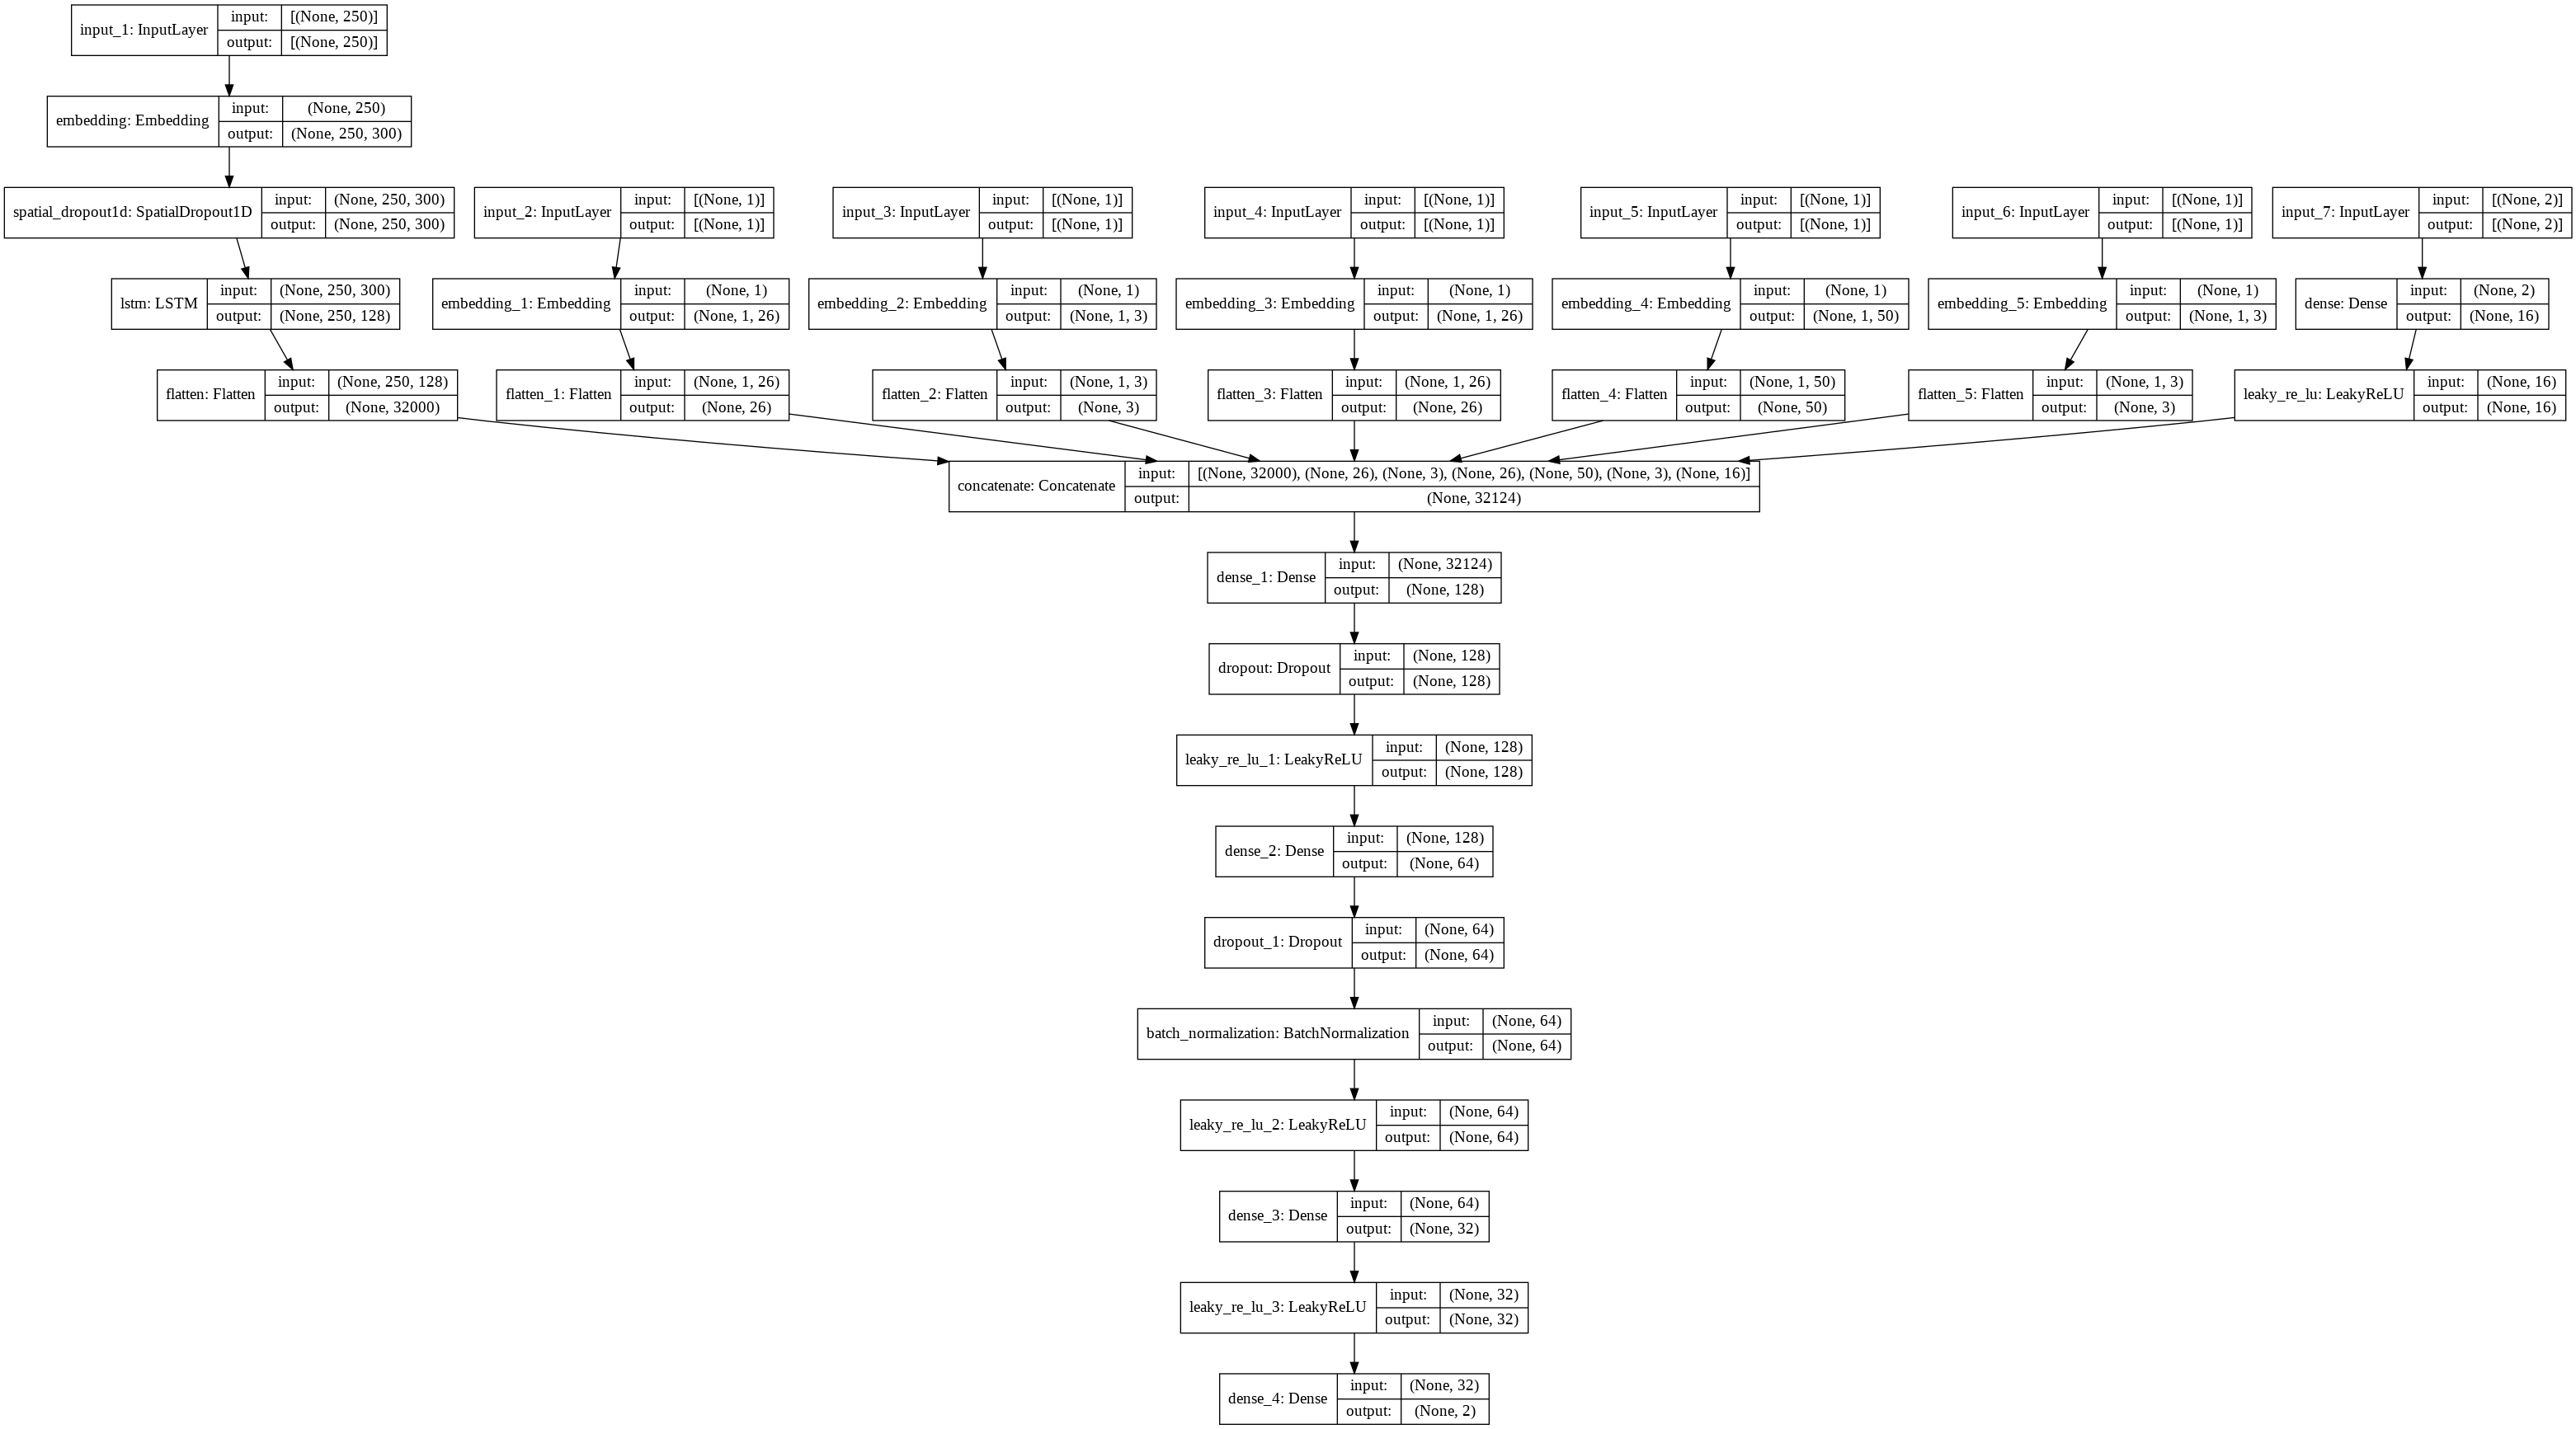

In [64]:
#https://machinelearningmastery.com/visualize-deep-learning-neural-network-model-keras/
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='/content/drive/My Drive/test/model_1.png', show_shapes=True, show_layer_names=True)

In [65]:
# print shape of train data
print(X_train_essay.shape)
print(X_train_school_state_ohe.shape)
print(X_train_project_grade_category_ohe.shape)
print(X_train_clean_categories_ohe.shape)
print(X_train_clean_subcategories_ohe.shape)
print(X_train_teacher_prefix_ohe.shape)
print(norm_train.shape)
print('*'*100)
# print shape of cv data
print(X_cv_essay.shape)
print(X_cv_school_state_ohe.shape)
print(X_cv_project_grade_category_ohe.shape)
print(X_cv_clean_categories_ohe.shape)
print(X_cv_clean_subcategories_ohe.shape)
print(X_cv_teacher_prefix_ohe.shape)
print(X_cv['remaining_input'].shape)
print('*'*100)
# print shape of test data
print(X_test_essay.shape)
print(X_test_school_state_ohe.shape)
print(X_test_project_grade_category_ohe.shape)
print(X_test_clean_categories_ohe.shape)
print(X_test_clean_subcategories_ohe.shape)
print(X_test_teacher_prefix_ohe.shape)
print(X_test['remaining_input'].shape)
print('*'*100)

(69918, 250)
(69918, 1)
(69918, 1)
(69918, 1)
(69918, 1)
(69918, 1)
(69918, 2)
****************************************************************************************************
(17480, 250)
(17480, 1)
(17480, 1)
(17480, 1)
(17480, 1)
(17480, 1)
(17480,)
****************************************************************************************************
(21850, 250)
(21850, 1)
(21850, 1)
(21850, 1)
(21850, 1)
(21850, 1)
(21850,)
****************************************************************************************************


In [ ]:
# with open('/content/drive/My Drive/LSTM Output/abc.gdoc', 'w') as f:
#   f.write('content')

#model fitting
#https://machinelearningmastery.com/check-point-deep-learning-models-keras/ 
filepath="/content/drive/My Drive/test/weights_copy_new_23_1.best.hdf5"

earlystopping_1 = EarlyStopping(monitor='val_loss', patience=2, verbose=1)

checkpoint = ModelCheckpoint(filepath, monitor='val_auc', verbose=1, save_best_only=True, mode='max')

callbacks_list = [checkpoint,tensorboard,earlystopping_1]

model.fit([X_train_essay, X_train_school_state_ohe, X_train_project_grade_category_ohe, X_train_clean_categories_ohe, X_train_clean_subcategories_ohe, X_train_teacher_prefix_ohe, norm_train], y_train, nb_epoch=3, verbose=1, batch_size=256, validation_data=([X_cv_essay, X_cv_school_state_ohe, X_cv_project_grade_category_ohe, X_cv_clean_categories_ohe, X_cv_clean_subcategories_ohe, X_cv_teacher_prefix_ohe, norm_cv]  , y_cv), callbacks = callbacks_list)

In [ ]:
# Load model with best weights

from keras import regularizers
#input 1 essay text
input1 = Input(shape=(250,))
# x1 = Embedding(input_dim=49042,output_dim= 300)(input1)
vocab_size = len(t.word_index) + 1
x1 = Embedding(input_dim=vocab_size,output_dim= 300,weights=[X_train_essay_mat],trainable=False)(input1)
x1 = SpatialDropout1D(0.3)(x1)
# x1 = CuDNNLSTM(128,return_sequences=True)(x1)
x1 = LSTM(128,recurrent_dropout=0.5,kernel_regularizer=regularizers.l2(0.001),return_sequences=True)(x1) # dropout=0.5
# x1 = LSTM(128,return_sequences=True)(x1)
x1 = Flatten()(x1)

#https://medium.com/@davidheffernan_99410/an-introduction-to-using-categorical-embeddings-ee686ed7e7f9
cat_vars = ["teacher_prefix","school_state","project_grade_category","clean_categories","clean_subcategories"]
cat_sizes = {}
cat_embsizes = {}
for cat in cat_vars:
    cat_sizes[cat] = X_train[cat].nunique()
    cat_embsizes[cat] = min(50, cat_sizes[cat]//2+1)  

# input 2 school_state 51
input2 = Input(shape=(1,))
x2 = Embedding(input_dim=cat_sizes['school_state']+1, output_dim=cat_embsizes['school_state'])(input2)#input_dim=52
x2 = Flatten()(x2)

# input 3 project_grade_cat 4
input3 = Input(shape=(1,))
x3 = Embedding(input_dim=cat_sizes['project_grade_category']+1, output_dim=cat_embsizes['project_grade_category'])(input3)
x3 = Flatten()(x3)

# input 4 clean_categories 9
input4 = Input(shape=(1,))
x4 = Embedding(input_dim=cat_sizes['clean_categories']+1, output_dim=cat_embsizes['clean_categories'])(input4)
x4 = Flatten()(x4)

# input 5 clean_subcategories 30
input5 = Input(shape=(1,))
x5 = Embedding(input_dim=cat_sizes['clean_subcategories']+1, output_dim=cat_embsizes['clean_subcategories'])(input5)
x5 = Flatten()(x5)

# input 6 teacher_prefix 5
input6 = Input(shape=(1,))
x6 = Embedding(input_dim=cat_sizes['teacher_prefix']+1, output_dim=cat_embsizes['teacher_prefix'])(input6)
x6 = Flatten()(x6)

# print(cat_concat)

#input 7 remaining inout
input7 = Input(shape=(2,))
x7 = Dense(16,kernel_initializer=he_normal(),kernel_regularizer=l2(0.0001))(input7)
x7 = LeakyReLU()(x7)

concat = concatenate([x1, x2, x3, x4, x5, x6, x7])

x = Dense(128,kernel_initializer=he_normal(),kernel_regularizer=l2(0.0001))(concat)
x = Dropout(0.5)(x)
x = LeakyReLU()(x)
x = Dense(64,kernel_initializer=he_normal(),kernel_regularizer=l2(0.0001))(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dense(32,kernel_initializer=he_normal(),kernel_regularizer=l2(0.0001))(x)
x = LeakyReLU()(x)
# x = Dropout(0.5)(x)
output = Dense(2, activation = 'softmax')(x)

# create model with seven inputs
model = Model([input1,input2,input3,input4,input5,input6,input7], output)#
model.run_eagerly = True
tensorboard = TensorBoard(log_dir='/content/drive/My Drive/test/logs/{}'.format(time()))
# tensorboard = TensorBoard(log_dir='logs')
model.load_weights(filepath)#"weights_copy.best.hdf5"
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(lr=0.0006,decay = 1e-4),metrics=['accuracy', auc])
# print(model.summary())
# print(model.summary())

In [ ]:
filepath

In [ ]:
print("AUC for test data: %0.3f"%roc_auc_score(y_test,model.predict([X_test_essay, X_test_school_state_ohe, X_test_project_grade_category_ohe, X_test_clean_categories_ohe, X_test_clean_subcategories_ohe, X_test_teacher_prefix_ohe, norm_test])))
print("AUC for CV data: %0.3f"%roc_auc_score(y_cv,model.predict([X_cv_essay, X_cv_school_state_ohe, X_cv_project_grade_category_ohe, X_cv_clean_categories_ohe, X_cv_clean_subcategories_ohe, X_cv_teacher_prefix_ohe, norm_cv])))
print("AUC for train data: %0.3f"%roc_auc_score(y_train,model.predict([X_train_essay, X_train_school_state_ohe, X_train_project_grade_category_ohe, X_train_clean_categories_ohe, X_train_clean_subcategories_ohe, X_train_teacher_prefix_ohe, norm_train])))

<h1>Attach Tensorboard Image from logs directory</h1>

<img src='https://i.imgur.com/W8BwiNL.png' /> Ref: https://i.imgur.com/W8BwiNL.png

<h1>Assignment 2</h1>

Use the same model as above but for 'input_seq_total_text_data' give only some words in the sentance not all the words. Filter the words as below. 

<pre>
1. Train the TF-IDF on the Train data <br>
2. Get the idf value for each word we have in the train data. <br>
3. Remove the low idf value and high idf value words from our data. Do some analysis on the Idf values and based on those values choose the low and high threshold value. Because very frequent words and very very rare words don't give much information. (you can plot a box plots and take only the idf scores within IQR range and corresponding words)<br>
4. Train the LSTM after removing the Low and High idf value words. (In model-1 Train on total data but in Model-2 train on data after removing some words based on IDF values)
</pre>

In [66]:
vectorizer = TfidfVectorizer(min_df=10) #Defining TFIDF with min_df=10  3,max_features=10000
imp_tf = vectorizer.fit(X_train['essay'])

In [67]:
idf_values = vectorizer.idf_ 

In [68]:
df = pd.DataFrame(idf_values, columns= ["idf"])
df.head()

,idf
0,7.220619
1,5.938487
2,9.757197
3,4.501124
4,3.802538


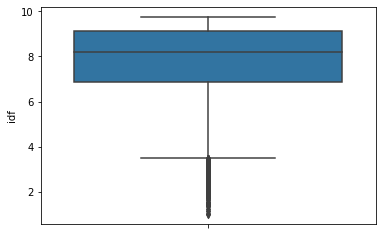

In [69]:
import seaborn as sns

sns.boxplot(y = "idf", data = df )

In [70]:
#calculating speed values at each percntile 0,10,20,30,40,50,60,70,80,90,100 
for i in range(0,100,10):
    var =idf_values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

0 percentile value is 1.007695548451894
10 percentile value is 5.38086882181003
20 percentile value is 6.464733253843585
30 percentile value is 7.206332817789477
40 percentile value is 7.748373460903392
50 percentile value is 8.184800794615523
60 percentile value is 8.628732183551485
70 percentile value is 8.977038877819698
80 percentile value is 9.26472095027148
90 percentile value is 9.590143350706109
100 percentile value is  9.757197435369275


In [71]:
for i in range(0,100,5):
    var =idf_values
    var = np.sort(var,axis = None)
    print("{} percentile value is {}".format(i,var[int(len(var)*(float(i)/100))]))
print("100 percentile value is ",var[-1])

0 percentile value is 1.007695548451894
5 percentile value is 4.500649481697533
10 percentile value is 5.38086882181003
15 percentile value is 5.950534945598955
20 percentile value is 6.464733253843585
25 percentile value is 6.856775341619609
30 percentile value is 7.206332817789477
35 percentile value is 7.501132358010122
40 percentile value is 7.748373460903392
45 percentile value is 7.9807054382720075
50 percentile value is 8.184800794615523
55 percentile value is 8.417423089884277
60 percentile value is 8.628732183551485
65 percentile value is 8.78779687818117
70 percentile value is 8.977038877819698
75 percentile value is 9.110570270444223
80 percentile value is 9.26472095027148
85 percentile value is 9.447042507065435
90 percentile value is 9.590143350706109
95 percentile value is 9.670186058379645
100 percentile value is  9.757197435369275


In [72]:
print("The 25 percentile of idf score is :", np.percentile(idf_values,[25]))
print("The 75 percentile of idf score is :",np.percentile(idf_values,[75]))

The 25 percentile of idf score is : [6.85802848]
The 75 percentile of idf score is : [9.11057027]


- We will pick essay text features that has idf_ values b/w 6.27 to 8.33
- As per reviewer I considered idf values from 2 to 10 

In [73]:
percentile_25th = 2  #np.percentile(idf_values,[25])
percentile_75th = 10   #np.percentile(idf_values,[75])

In [74]:
feature_idf = zip(imp_tf.get_feature_names(),idf_values)

feature_name = []
for x,y in feature_idf:
    
    if y >= percentile_25th and y <= percentile_75th:
        feature_name.append(x)

print(len(feature_name))

13957


In [75]:
print(feature_name)

['00', '000', '00pm', '10', '100', '1000', '100th', '101', '102', '103', '104', '105', '107', '10th', '11', '110', '1100', '115', '11th', '12', '120', '1200', '123', '125', '12th', '13', '130', '1300', '135', '13th', '14', '140', '1400', '145', '14th', '15', '150', '1500', '15th', '16', '160', '1600', '165', '17', '170', '1700', '175', '17th', '18', '180', '1800', '19', '1900', '1930', '1950', '1950s', '1960', '1960s', '1980', '1984', '1988', '1990', '1993', '1998', '1999', '19th', '1st', '20', '200', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2020', '2029', '20th', '21', '21st', '22', '220', '225', '23', '24', '240', '25', '250', '2500', '26', '260', '27', '270', '28', '280', '29', '2d', '2nd', '30', '300', '3000', '30am', '30pm', '31', '3120', '32', '320', '33', '330', '34', '340', '35', '350', '36', '360', '365', '37', '375', '38', '380', '39', '3d', '3doodle', '3doodler', '

In [76]:
from tqdm import tqdm
def get_text_on_idf_features(essay_text):
  '''
  This method collects words within 25 to 75 percentile
  '''
  preprocessed_text = []
  # Iterate each essay text
  for sent in tqdm(essay_text):
    words = sent.split()
    final_sent = ''
    # Iterate for each esssay word
    for word in words:
      # Check word exists in idf corpus
      if(word in feature_name):
        final_sent += ' ' + word
        
    preprocessed_text.append(final_sent)

  return preprocessed_text 


In [77]:
# sample 1
sample_data = get_text_on_idf_features(['I am here', 'I am here', 'I am here', 'I am here'])
sample_data

100%|██████████| 4/4 [00:00<00:00, 1106.38it/s]


[' am here', ' am here', ' am here', ' am here']

In [78]:
print(X_train['essay'].shape)
print(type(X_train['essay']))
print(X_train['essay'][0:5])
print(X_train['essay'][0:1])

(69918,)
<class 'pandas.core.series.Series'>
58308    my students walk classroom every day full life...
77835    i group 23 smart creative kind second graders ...
15185    every single child ability learn i love able g...
49970    welcome westwood elementary we small town subu...
34976    my students awesome i teach low income school ...
Name: essay, dtype: object
58308    my students walk classroom every day full life...
Name: essay, dtype: object


In [79]:
# sample 2
sample_data_2 = get_text_on_idf_features(X_train['essay'][0:5])
sample_data_2

100%|██████████| 5/5 [00:00<00:00, 50.57it/s]


[' walk every full life excited store teach title texas 95 percent receive free breakfast lunch receive backpack food weekend despite hardships eager best want want successful one get experience hands manipulatives better extend some books home book exposure better matching working maze activities tremendously achieve standards lacking fine motor skills looking better skill tweezers magnetic designer handy when listening station becomes tangled storage center keep organized easily functional',
 ' group 23 smart creative kind second graders reading writing new things every lucky never dull moment every adventure group bilingual households one hundred percent receive free breakfast lunch even challenges face always ready hard lucky teacher recently ordered listening center donor choose it funded absolutely it fun engaging way read independent listening centers enough entire small group way take turns read half book instead everyone group listening great story book front hands swivel chai

In [80]:
# sample 3 final testing
sample_data_3 = get_text_on_idf_features(['piano specially paramount microscopes figuring'])
sample_data_3

100%|██████████| 1/1 [00:00<00:00, 348.91it/s]


[' piano specially paramount microscopes figuring']

In [81]:
print(X_train['essay'][0:10])

58308     my students walk classroom every day full life...
77835     i group 23 smart creative kind second graders ...
15185     every single child ability learn i love able g...
49970     welcome westwood elementary we small town subu...
34976     my students awesome i teach low income school ...
11264     imagine learning reading group 4 6 students no...
74104     as teacher high poverty title 1 school student...
57611     my students excellent work ethic hard working ...
100026    my students great group hard working first gra...
39152     itech thomas edison educational center student...
Name: essay, dtype: object


In [82]:
# filter train data
X_train_essay_orig = X_train['essay']
X_train_assign_2 = []
X_train_assign_2 = get_text_on_idf_features(X_train['essay'])
len(X_train_assign_2)

100%|██████████| 69918/69918 [24:24<00:00, 47.74it/s]


69918

In [83]:
# filter cv data
X_cv_essay_orig = X_cv['essay']
X_cv_assign_2 = []
X_cv_assign_2 = get_text_on_idf_features(X_cv['essay'])
len(X_cv_assign_2)

100%|██████████| 17480/17480 [06:05<00:00, 47.89it/s]


17480

In [84]:
# filter test data
X_test_essay_orig = X_test['essay']
X_test_assign_2 = []
X_test_assign_2 = get_text_on_idf_features(X_test['essay'])
len(X_test_assign_2)

100%|██████████| 21850/21850 [07:36<00:00, 47.87it/s]


21850

In [85]:
print(X_train['essay'])
print(X_cv['essay'])
print(X_test['essay'])
print(X_train_essay_orig)
print(X_cv_essay_orig)
print(X_test_essay_orig)

58308    my students walk classroom every day full life...
77835    i group 23 smart creative kind second graders ...
15185    every single child ability learn i love able g...
49970    welcome westwood elementary we small town subu...
34976    my students awesome i teach low income school ...
                               ...                        
75910    every day different this i love teaching eleme...
12612    after working children asd private sector i we...
56149    the children school amazingly talented middle ...
77771    the artists classroom living neighborhood high...
16880    my students stars need chance show brightly sh...
Name: essay, Length: 69918, dtype: object
19110     east brunswick suburb 45 minutes away new york...
3475      my students school learn help everyone else le...
106468    how support students struggle typical classroo...
49100     my students come variety backgrounds including...
49883     the resource room home specialized instruction...
         

In [ ]:
# # convert review word as well i.e. tokenize review text
# # this step is mandatory as we converted essay data
# # - text : text data
# print(X_train.shape, y_train.shape)
# print(X_cv.shape, y_cv.shape)
# print(X_test.shape, y_test.shape)

# print("*"*100)

# (easy_features, rank_dict)  = fit_transform_train_data(X_train_assign_2) # fit has to happen only on train data

# # we use the fitted CountVectorizer to convert the text to vector
# X_train_essay = transform_data(X_train_assign_2, rank_dict)
# X_cv_essay = transform_data(X_cv_assign_2, rank_dict)
# X_test_essay = transform_data(X_test_assign_2, rank_dict)

# print("After vectorizations")
# print(len(X_train_essay), y_train.shape)
# print(len(X_cv_essay), y_cv.shape)
# print(len(X_test_essay), y_test.shape)
# # print(easy_features)
# print(len(easy_features))
# print("*"*100)

In [86]:
#https://stackoverflow.com/posts/51956230/revisions
t = Tokenizer()
t.fit_on_texts(X_train_assign_2)
vocab_size = len(t.word_index) + 1
# integer encode the documents
encoded_docs = t.texts_to_sequences(X_train_assign_2)
X_train_essay = padded(encoded_docs)

In [87]:
#t = Tokenizer()
#t.fit_on_texts(x_cross.cleaned_essay)
#vocab_size = len(t.word_index) + 1
# integer encode the documents
encoded_docs = t.texts_to_sequences(X_cv_assign_2)
X_cv_essay = padded(encoded_docs)

In [88]:
#t = Tokenizer()
#t.fit_on_texts(x_test.cleaned_essay)
#vocab_size = len(t.word_index) + 1
# integer encode the documents
encoded_docs = t.texts_to_sequences(X_test_assign_2)
X_test_essay = padded(encoded_docs)

In [89]:
embedding_matrix = np.zeros((vocab_size, 300))
for word, i in t.word_index.items():
	embedding_vector = embeddings_index.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector

In [90]:
project_data['essay']

0         i fortunate enough use fairy tale stem kits cl...
1         imagine 8 9 years old you third grade classroo...
2         having class 24 students comes diverse learner...
3         i recently read article giving students choice...
4         my students crave challenge eat obstacles brea...
                                ...                        
109243    our day starts 100 students athletes low incom...
109244    my students range age four five years old atte...
109245    we title 1 school 650 total students our eleme...
109246    i teach many different types students my class...
109247    my first graders eager learn world around they...
Name: essay, Length: 109248, dtype: object

In [91]:
print(X_train['essay'][0:5].values[0])
string = str(X_train['essay'][0:5].values[0])
type(string)

my students walk classroom every day full life excited store day i teach title i school texas 95 percent students receive free breakfast lunch many students receive backpack food weekend despite many hardships students eager learn best they want school want learn successful one day my students get experience hands manipulatives better extend learning some students not books home book exposure students better matching working classroom maze activities help students tremendously achieve standards my students also lacking fine motor skills i looking better skill tweezers magnetic designer come handy when students listening station becomes tangled storage center help keep organized easily functional nannan


str

In [92]:
# # zero padding newly created data
# #padding zeros at the begining of each easy to make max len as 250
# max_easy_length = 250
# X_train_essay = pad_sequences(X_train_essay, maxlen=max_easy_length)
# X_cv_essay = pad_sequences(X_cv_essay, maxlen=max_easy_length)
# X_test_essay = pad_sequences(X_test_essay, maxlen=max_easy_length)
# print(X_train_essay.shape)
# print(X_train_essay[0])
# print(X_train_essay[1])
# print(X_cv_essay.shape)
# print(X_cv_essay[0])
# # print(X_cv_essay[1])
# print(X_test_essay.shape)
# print(X_test_essay[0])
# # print(X_test_essay[1])

In [93]:
print(type(X_train['essay']))
print(X_train['essay'])

<class 'pandas.core.series.Series'>
58308    my students walk classroom every day full life...
77835    i group 23 smart creative kind second graders ...
15185    every single child ability learn i love able g...
49970    welcome westwood elementary we small town subu...
34976    my students awesome i teach low income school ...
                               ...                        
75910    every day different this i love teaching eleme...
12612    after working children asd private sector i we...
56149    the children school amazingly talented middle ...
77771    the artists classroom living neighborhood high...
16880    my students stars need chance show brightly sh...
Name: essay, Length: 69918, dtype: object


In [94]:
print(type(X_train_assign_2))
print(X_train_assign_2[0:5])
print(X_train['essay'][0:5])

<class 'list'>
[' walk every full life excited store teach title texas 95 percent receive free breakfast lunch receive backpack food weekend despite hardships eager best want want successful one get experience hands manipulatives better extend some books home book exposure better matching working maze activities tremendously achieve standards lacking fine motor skills looking better skill tweezers magnetic designer handy when listening station becomes tangled storage center keep organized easily functional', ' group 23 smart creative kind second graders reading writing new things every lucky never dull moment every adventure group bilingual households one hundred percent receive free breakfast lunch even challenges face always ready hard lucky teacher recently ordered listening center donor choose it funded absolutely it fun engaging way read independent listening centers enough entire small group way take turns read half book instead everyone group listening great story book front han

In [95]:
# create weight matrix on newly created list
# X_train_essay_mat = embedding_mat(pd.Series(X_train_assign_2))#X_train['essay']
# print(X_train_essay_mat.shape)
# X_train_essay_mat[5]

In [96]:
X_train_essay_mat = embedding_matrix
X_train_essay_mat.shape

(13958, 300)

In [97]:
# Create model 1 for assignment 2

from keras import regularizers
#input 1 essay text
input1 = Input(shape=(250,))
# x1 = Embedding(input_dim=49042,output_dim= 300)(input1)
vocab_size = len(t.word_index) + 1
# vocab_size = len(t.word_index) + 1
x1 = Embedding(input_dim=vocab_size,output_dim= 300,weights=[X_train_essay_mat],trainable=False)(input1)
x1 = SpatialDropout1D(0.3)(x1)
# x1 = CuDNNLSTM(128,return_sequences=True)(x1)
x1 = LSTM(128,recurrent_dropout=0.5,kernel_regularizer=regularizers.l2(0.001),return_sequences=True)(x1) # dropout=0.5
# x1 = LSTM(128,return_sequences=True)(x1)
x1 = Flatten()(x1)

#https://medium.com/@davidheffernan_99410/an-introduction-to-using-categorical-embeddings-ee686ed7e7f9
cat_vars = ["teacher_prefix","school_state","project_grade_category","clean_categories","clean_subcategories"]
cat_sizes = {}
cat_embsizes = {}
for cat in cat_vars:
    cat_sizes[cat] = X_train[cat].nunique()
    cat_embsizes[cat] = min(50, cat_sizes[cat]//2+1)  

# input 2 school_state 51
input2 = Input(shape=(1,))
x2 = Embedding(input_dim=cat_sizes['school_state']+1, output_dim=cat_embsizes['school_state'])(input2)#input_dim=52
x2 = Flatten()(x2)

# input 3 project_grade_cat 4
input3 = Input(shape=(1,))
x3 = Embedding(input_dim=cat_sizes['project_grade_category']+1, output_dim=cat_embsizes['project_grade_category'])(input3)
x3 = Flatten()(x3)

# input 4 clean_categories 9
input4 = Input(shape=(1,))
x4 = Embedding(input_dim=cat_sizes['clean_categories']+1, output_dim=cat_embsizes['clean_categories'])(input4)
x4 = Flatten()(x4)

# input 5 clean_subcategories 30
input5 = Input(shape=(1,))
x5 = Embedding(input_dim=cat_sizes['clean_subcategories']+1, output_dim=cat_embsizes['clean_subcategories'])(input5)
x5 = Flatten()(x5)

# input 6 teacher_prefix 5
input6 = Input(shape=(1,))
x6 = Embedding(input_dim=cat_sizes['teacher_prefix']+1, output_dim=cat_embsizes['teacher_prefix'])(input6)
x6 = Flatten()(x6)

# print(cat_concat)

#input 7 remaining inout
input7 = Input(shape=(2,))
x7 = Dense(16,kernel_initializer=he_normal(),kernel_regularizer=l2(0.0001))(input7)
x7 = LeakyReLU()(x7)

concat = concatenate([x1, x2, x3, x4, x5, x6, x7])

x = Dense(128,kernel_initializer=he_normal(),kernel_regularizer=l2(0.0001))(concat)
x = Dropout(0.5)(x)
x = LeakyReLU()(x)
x = Dense(64,kernel_initializer=he_normal(),kernel_regularizer=l2(0.0001))(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dense(32,kernel_initializer=he_normal(),kernel_regularizer=l2(0.0001))(x)
x = LeakyReLU()(x)
# x = Dropout(0.5)(x)
output = Dense(2, activation = 'softmax')(x)

# create model with seven inputs
model = Model([input1,input2,input3,input4,input5,input6,input7], output)#
model.run_eagerly = True
tensorboard = TensorBoard(log_dir='/content/drive/My Drive/test/logs/{}'.format(time()))
# tensorboard = TensorBoard(log_dir='logs')

# Defining Custom ROC-AUC Metrics
from sklearn.metrics import roc_auc_score

def auc1(y_true, y_pred):
    if len(np.unique(y_true[:,1])) == 1:
        return 0.5
    else:
        return roc_auc_score(y_true, y_pred)

def auroc(y_true, y_pred):
    return tf.numpy_function(auc1, (y_true, y_pred), tf.double)


model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(lr=0.0006,decay = 1e-4),metrics=['accuracy', auroc])
print(model.summary())

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 250)]        0                                            
__________________________________________________________________________________________________
embedding_6 (Embedding)         (None, 250, 300)     4187400     input_8[0][0]                    
__________________________________________________________________________________________________
spatial_dropout1d_1 (SpatialDro (None, 250, 300)     0           embedding_6[0][0]                
__________________________________________________________________________________________________
input_9 (InputLayer)            [(None, 1)]          0                                            
____________________________________________________________________________________________

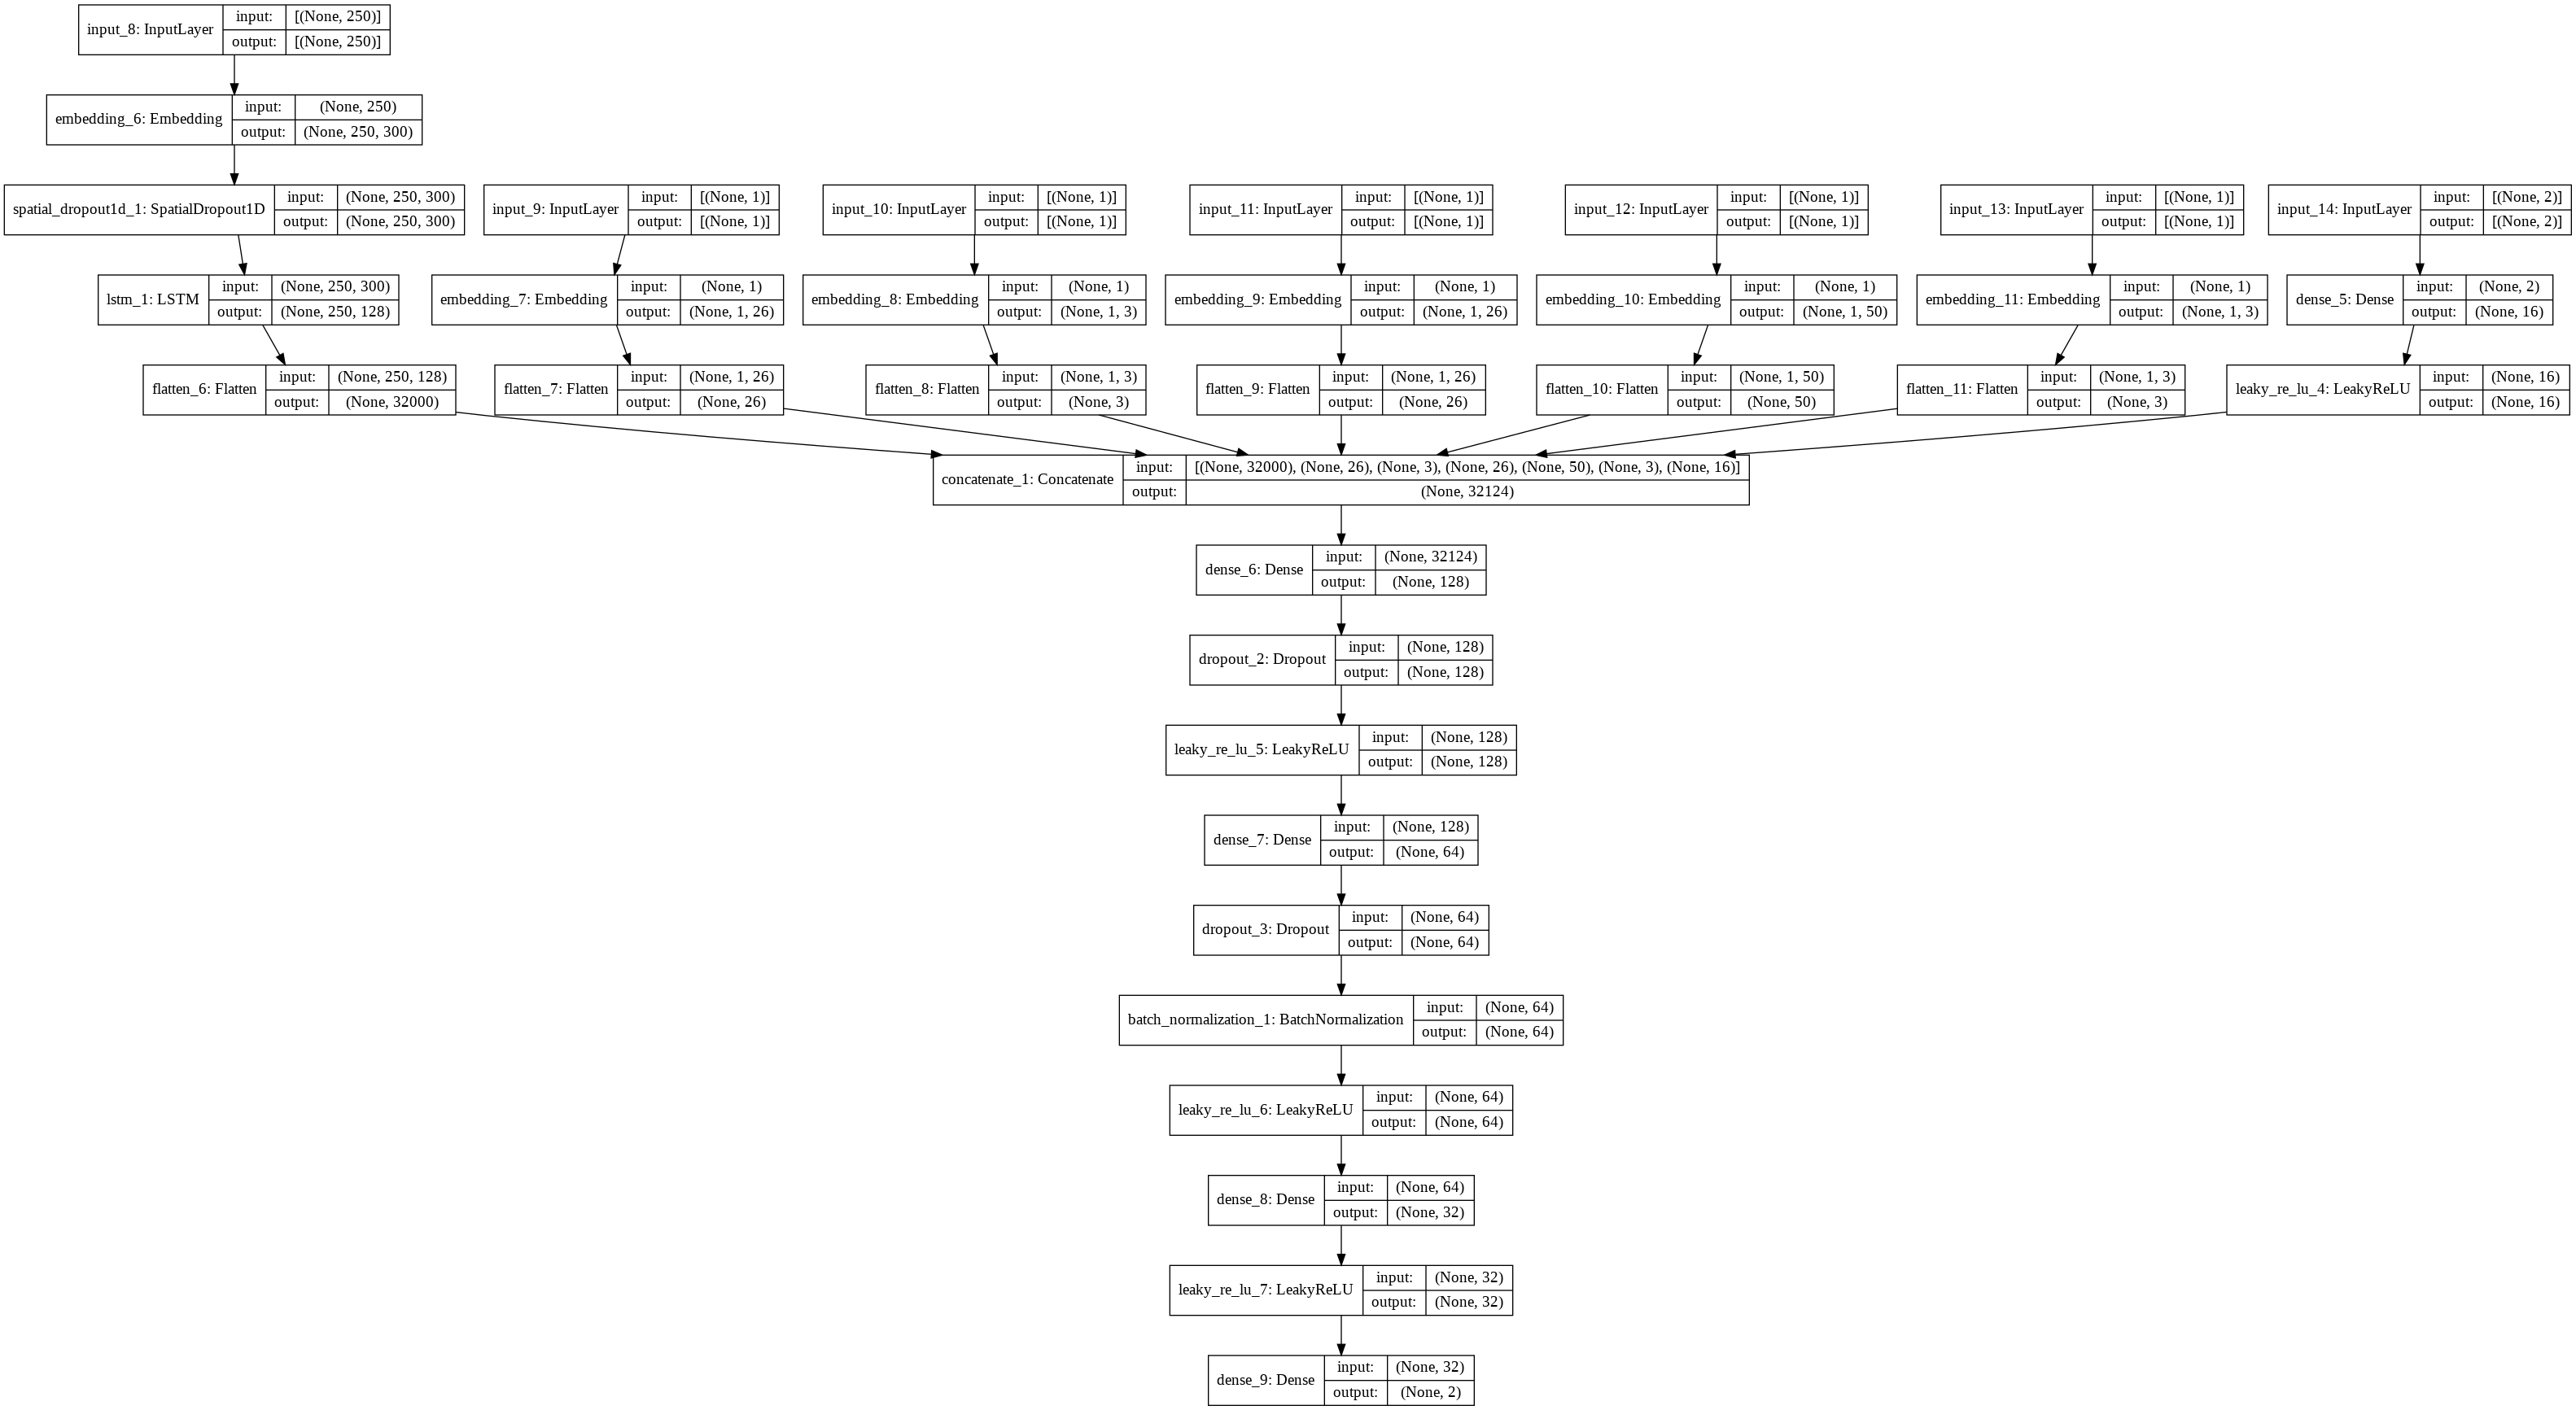

In [98]:
#https://machinelearningmastery.com/visualize-deep-learning-neural-network-model-keras/
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='/content/drive/My Drive/test/model_2.png', show_shapes=True, show_layer_names=True)

In [99]:
# print shape of train data
print(X_train_essay.shape)
print(X_train_school_state_ohe.shape)
print(X_train_project_grade_category_ohe.shape)
print(X_train_clean_categories_ohe.shape)
print(X_train_clean_subcategories_ohe.shape)
print(X_train_teacher_prefix_ohe.shape)
print(X_train['remaining_input'].shape)
print('*'*100)
# print shape of cv data
print(X_cv_essay.shape)
print(X_cv_school_state_ohe.shape)
print(X_cv_project_grade_category_ohe.shape)
print(X_cv_clean_categories_ohe.shape)
print(X_cv_clean_subcategories_ohe.shape)
print(X_cv_teacher_prefix_ohe.shape)
print(X_cv['remaining_input'].shape)
print('*'*100)
# print shape of test data
print(X_test_essay.shape)
print(X_test_school_state_ohe.shape)
print(X_test_project_grade_category_ohe.shape)
print(X_test_clean_categories_ohe.shape)
print(X_test_clean_subcategories_ohe.shape)
print(X_test_teacher_prefix_ohe.shape)
print(X_test['remaining_input'].shape)
print('*'*100)

(69918, 250)
(69918, 1)
(69918, 1)
(69918, 1)
(69918, 1)
(69918, 1)
(69918,)
****************************************************************************************************
(17480, 250)
(17480, 1)
(17480, 1)
(17480, 1)
(17480, 1)
(17480, 1)
(17480,)
****************************************************************************************************
(21850, 250)
(21850, 1)
(21850, 1)
(21850, 1)
(21850, 1)
(21850, 1)
(21850,)
****************************************************************************************************


In [ ]:
# with open('/content/drive/My Drive/LSTM Output/abc.gdoc', 'w') as f:
#   f.write('content')

#model fitting
#https://machinelearningmastery.com/check-point-deep-learning-models-keras/
filepath="/content/drive/My Drive/test/weights_copy_new_23_2.best.hdf5"

earlystopping_1 = EarlyStopping(monitor='val_loss', patience=2, verbose=1)

checkpoint = ModelCheckpoint(filepath, monitor='val_auc', verbose=1, save_best_only=True, mode='max')

callbacks_list = [checkpoint,tensorboard,earlystopping_1]

model.fit([X_train_essay, X_train_school_state_ohe, X_train_project_grade_category_ohe, X_train_clean_categories_ohe, X_train_clean_subcategories_ohe, X_train_teacher_prefix_ohe, norm_train], y_train, nb_epoch=3, verbose=1, batch_size=256, validation_data=([X_cv_essay, X_cv_school_state_ohe, X_cv_project_grade_category_ohe, X_cv_clean_categories_ohe, X_cv_clean_subcategories_ohe, X_cv_teacher_prefix_ohe, norm_cv]  , y_cv), callbacks = callbacks_list)


In [ ]:
# Load model with best weights for assignment 2

from keras import regularizers
#input 1 essay text
input1 = Input(shape=(250,))
# x1 = Embedding(input_dim=49042,output_dim= 300)(input1)
vocab_size = len(t.word_index) + 1
# vocab_size = len(t.word_index) + 1
x1 = Embedding(input_dim=vocab_size,output_dim= 300,weights=[X_train_essay_mat],trainable=False)(input1)
x1 = SpatialDropout1D(0.3)(x1)
# x1 = CuDNNLSTM(128,return_sequences=True)(x1)
x1 = LSTM(128,recurrent_dropout=0.5,kernel_regularizer=regularizers.l2(0.001),return_sequences=True)(x1) # dropout=0.5
# x1 = LSTM(128,return_sequences=True)(x1)
x1 = Flatten()(x1)

#https://medium.com/@davidheffernan_99410/an-introduction-to-using-categorical-embeddings-ee686ed7e7f9
cat_vars = ["teacher_prefix","school_state","project_grade_category","clean_categories","clean_subcategories"]
cat_sizes = {}
cat_embsizes = {}
for cat in cat_vars:
    cat_sizes[cat] = X_train[cat].nunique()
    cat_embsizes[cat] = min(50, cat_sizes[cat]//2+1)  

# input 2 school_state 51
input2 = Input(shape=(1,))
x2 = Embedding(input_dim=cat_sizes['school_state']+1, output_dim=cat_embsizes['school_state'])(input2)#input_dim=52
x2 = Flatten()(x2)

# input 3 project_grade_cat 4
input3 = Input(shape=(1,))
x3 = Embedding(input_dim=cat_sizes['project_grade_category']+1, output_dim=cat_embsizes['project_grade_category'])(input3)
x3 = Flatten()(x3)

# input 4 clean_categories 9
input4 = Input(shape=(1,))
x4 = Embedding(input_dim=cat_sizes['clean_categories']+1, output_dim=cat_embsizes['clean_categories'])(input4)
x4 = Flatten()(x4)

# input 5 clean_subcategories 30
input5 = Input(shape=(1,))
x5 = Embedding(input_dim=cat_sizes['clean_subcategories']+1, output_dim=cat_embsizes['clean_subcategories'])(input5)
x5 = Flatten()(x5)

# input 6 teacher_prefix 5
input6 = Input(shape=(1,))
x6 = Embedding(input_dim=cat_sizes['teacher_prefix']+1, output_dim=cat_embsizes['teacher_prefix'])(input6)
x6 = Flatten()(x6)

# print(cat_concat)

#input 7 remaining inout
input7 = Input(shape=(2,))
x7 = Dense(16,kernel_initializer=he_normal(),kernel_regularizer=l2(0.0001))(input7)
x7 = LeakyReLU()(x7)

concat = concatenate([x1, x2, x3, x4, x5, x6, x7])

x = Dense(128,kernel_initializer=he_normal(),kernel_regularizer=l2(0.0001))(concat)
x = Dropout(0.5)(x)
x = LeakyReLU()(x)
x = Dense(64,kernel_initializer=he_normal(),kernel_regularizer=l2(0.0001))(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dense(32,kernel_initializer=he_normal(),kernel_regularizer=l2(0.0001))(x)
x = LeakyReLU()(x)
# x = Dropout(0.5)(x)
output = Dense(2, activation = 'softmax')(x)

# create model with seven inputs
model = Model([input1,input2,input3,input4,input5,input6,input7], output)#
model.run_eagerly = True
tensorboard = TensorBoard(log_dir='/content/drive/My Drive/test/logs/{}'.format(time()))
# tensorboard = TensorBoard(log_dir='logs')
model.load_weights(filepath)
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(lr=0.0006,decay = 1e-4),metrics=['accuracy', auroc])

In [ ]:
print("AUC for test data: %0.3f"%roc_auc_score(y_test,model.predict([X_test_essay, X_test_school_state_ohe, X_test_project_grade_category_ohe, X_test_clean_categories_ohe, X_test_clean_subcategories_ohe, X_test_teacher_prefix_ohe, norm_test])))
print("AUC for CV data: %0.3f"%roc_auc_score(y_cv,model.predict([X_cv_essay, X_cv_school_state_ohe, X_cv_project_grade_category_ohe, X_cv_clean_categories_ohe, X_cv_clean_subcategories_ohe, X_cv_teacher_prefix_ohe, norm_cv])))
print("AUC for train data: %0.3f"%roc_auc_score(y_train,model.predict([X_train_essay, X_train_school_state_ohe, X_train_project_grade_category_ohe, X_train_clean_categories_ohe, X_train_clean_subcategories_ohe, X_train_teacher_prefix_ohe, norm_train])))

<h1>Assignment 2 Tensorboard Image</h1>

<img src='https://i.imgur.com/MclYcac.png'> Ref: https://i.imgur.com/MclYcac.png

<h1>Assignment 3</h1>


- __input_seq_total_text_data__: <br>
<pre>
    . Use text column('essay'), and use the Embedding layer to get word vectors. <br>
    . Use given predefined glove word vectors, don't train any word vectors. <br>
    . Use LSTM that is given above, get the LSTM output and Flatten that output. <br>
    . You are free to preprocess the input text as you needed. <br>
</pre>
- __Other_than_text_data__:<br>
<pre>
    . Convert all your Categorical values to onehot coded and then concatenate all these onehot vectors <br>
    . Neumerical values and use <a href='https://keras.io/getting-started/sequential-model-guide/#sequence-classification-with-1d-convolutions'>CNN1D</a> as shown in above figure. <br>
    . You are free to choose all CNN parameters like kernel sizes, stride.<br>
    
</pre>

In [100]:
# process other than text data
# Convert all your Categorical values to onehot coded and then concatenate all these onehot vectors
# Neumerical values

# One hot encoding of Categorical Feature
# - school_state : categorical data
vectorizer = CountVectorizer()
vectorizer.fit(X_train['school_state'].values)# Fit has to happen only on train data

X_train_school_state_ohe = vectorizer.transform(X_train['school_state'].values)
X_cv_school_state_ohe = vectorizer.transform(X_cv['school_state'].values)
X_test_school_state_ohe = vectorizer.transform(X_test['school_state'].values)

school_state_features = vectorizer.get_feature_names()

print(X_train_school_state_ohe.shape, y_train.shape)
print(X_cv_school_state_ohe.shape, y_cv.shape)
print(X_test_school_state_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print('*'*100)

(69918, 51) (69918, 2)
(17480, 51) (17480, 2)
(21850, 51) (21850, 2)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']
****************************************************************************************************


In [101]:
# One hot encoding of Categorical Feature
# - clean_categories : categorical data
vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_categories'].values)# Fit has to happen only on train data

X_train_clean_categories_ohe = vectorizer.transform(X_train['clean_categories'].values)
X_cv_clean_categories_ohe = vectorizer.transform(X_cv['clean_categories'].values)
X_test_clean_categories_ohe = vectorizer.transform(X_test['clean_categories'].values)

clean_categories_features = vectorizer.get_feature_names()

print(X_train_clean_categories_ohe.shape, y_train.shape)
print(X_cv_clean_categories_ohe.shape, y_cv.shape)
print(X_test_clean_categories_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print('*'*100)

(69918, 9) (69918, 2)
(17480, 9) (17480, 2)
(21850, 9) (21850, 2)
['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']
****************************************************************************************************


In [102]:
# One hot encoding of Categorical Feature
# - clean_subcategories : categorical data
vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_subcategories'].values)# Fit has to happen only on train data

X_train_clean_subcategories_ohe = vectorizer.transform(X_train['clean_subcategories'].values)
X_cv_clean_subcategories_ohe = vectorizer.transform(X_cv['clean_subcategories'].values)
X_test_clean_subcategories_ohe = vectorizer.transform(X_test['clean_subcategories'].values)

clean_subcategories_features = vectorizer.get_feature_names()

print(X_train_clean_subcategories_ohe.shape, y_train.shape)
print(X_cv_clean_subcategories_ohe.shape, y_cv.shape)
print(X_test_clean_subcategories_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print('*'*100)

(69918, 30) (69918, 2)
(17480, 30) (17480, 2)
(21850, 30) (21850, 2)
['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth']
****************************************************************************************************


In [103]:
# print(X_train['project_grade_category'])
# One hot encoding of Categorical Feature
# - project_grade_category : categorical data
# Convert one hot encoding for project grade category
vectorizer = CountVectorizer()
vectorizer.fit(X_train['project_grade_category'].values)# Fit has to happen only on train data

X_train_project_grade_category_ohe = vectorizer.transform(X_train['project_grade_category'].values)
X_cv_project_grade_category_ohe = vectorizer.transform(X_cv['project_grade_category'].values)
X_test_project_grade_category_ohe = vectorizer.transform(X_test['project_grade_category'].values)

project_grade_category_features = vectorizer.get_feature_names()

print(X_train_project_grade_category_ohe.shape, y_train.shape)
print(X_cv_project_grade_category_ohe.shape, y_cv.shape)
print(X_test_project_grade_category_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print('*'*100)

(69918, 4) (69918, 2)
(17480, 4) (17480, 2)
(21850, 4) (21850, 2)
['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']
****************************************************************************************************


In [104]:
# One hot encoding of Categorical Feature
# - teacher_prefix : categorical data
# print(X_train['teacher_prefix'].nunique())
vectorizer = CountVectorizer()
vectorizer.fit(X_train['teacher_prefix'].values)# Fit has to happen only on train data

X_train_teacher_prefix_ohe = vectorizer.transform(X_train['teacher_prefix'].values)
X_cv_clean_teacher_prefix_ohe = vectorizer.transform(X_cv['teacher_prefix'].values)
X_test_clean_teacher_prefix_ohe = vectorizer.transform(X_test['teacher_prefix'].values)

teacher_prefix_features = vectorizer.get_feature_names()

print(X_train_teacher_prefix_ohe.shape, y_train.shape)
print(X_cv_clean_teacher_prefix_ohe.shape, y_cv.shape)
print(X_test_clean_teacher_prefix_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print('*'*100)

(69918, 5) (69918, 2)
(17480, 5) (17480, 2)
(21850, 5) (21850, 2)
['dr', 'mr', 'mrs', 'ms', 'teacher']
****************************************************************************************************


In [105]:
# You no need to perform standardization/normalization on numerical data, 
# because you will classify data by using gini impurity in decision tree classifier.
# - remaining_input : numerical

X_train_remaining_input_norm = X_train['remaining_input'].values.reshape(-1,1)
X_cv_remaining_input_norm = X_cv['remaining_input'].values.reshape(-1,1)
X_test_remaining_input_norm = X_test['remaining_input'].values.reshape(-1,1)

print("After vectorizations")
print(X_train_remaining_input_norm.shape, y_train.shape)
print(X_cv_remaining_input_norm.shape, y_cv.shape)
print(X_test_remaining_input_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(69918, 1) (69918, 2)
(17480, 1) (17480, 2)
(21850, 1) (21850, 2)


In [106]:
# print(categories_one_hot.shape)
# print(sub_categories_one_hot.shape)
# print(text_bow.shape)
# print(price_standardized.shape)
print('Categorical Features')
print('*'*100)
print(X_train_school_state_ohe.shape, y_train.shape)
print(X_cv_school_state_ohe.shape, y_cv.shape)
print(X_test_school_state_ohe.shape, y_test.shape)
print('*'*100)
print(X_train_clean_categories_ohe.shape, y_train.shape)
print(X_cv_clean_categories_ohe.shape, y_cv.shape)
print(X_test_clean_categories_ohe.shape, y_test.shape)
print('*'*100)
print(X_train_clean_subcategories_ohe.shape, y_train.shape)
print(X_cv_clean_subcategories_ohe.shape, y_cv.shape)
print(X_test_clean_subcategories_ohe.shape, y_test.shape)
print('*'*100)
print(X_train_project_grade_category_ohe.shape, y_train.shape)
print(X_cv_project_grade_category_ohe.shape, y_cv.shape)
print(X_test_project_grade_category_ohe.shape, y_test.shape)
print('*'*100)
print(X_train_teacher_prefix_ohe.shape, y_train.shape)
print(X_cv_clean_teacher_prefix_ohe.shape, y_cv.shape)
print(X_test_clean_teacher_prefix_ohe.shape, y_test.shape)
print('*'*100)
print('Numerical Features')
print('*'*100)
print(X_train_remaining_input_norm.shape, y_train.shape)
print(X_cv_remaining_input_norm.shape, y_cv.shape)
print(X_test_remaining_input_norm.shape, y_test.shape)

Categorical Features
****************************************************************************************************
(69918, 51) (69918, 2)
(17480, 51) (17480, 2)
(21850, 51) (21850, 2)
****************************************************************************************************
(69918, 9) (69918, 2)
(17480, 9) (17480, 2)
(21850, 9) (21850, 2)
****************************************************************************************************
(69918, 30) (69918, 2)
(17480, 30) (17480, 2)
(21850, 30) (21850, 2)
****************************************************************************************************
(69918, 4) (69918, 2)
(17480, 4) (17480, 2)
(21850, 4) (21850, 2)
****************************************************************************************************
(69918, 5) (69918, 2)
(17480, 5) (17480, 2)
(21850, 5) (21850, 2)
****************************************************************************************************
Numerical Features
******************

In [107]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
# X = hstack((categories_one_hot, sub_categories_one_hot, text_bow, price_standardized))
# X.shape

X_train_real = X_train
X_cv_real = X_cv
X_test_real = X_test

X_train = hstack((X_train_school_state_ohe, X_train_clean_categories_ohe, X_train_clean_subcategories_ohe, X_train_project_grade_category_ohe, X_train_teacher_prefix_ohe, X_train_remaining_input_norm)).tocsr()
X_cv = hstack((X_cv_school_state_ohe, X_cv_clean_categories_ohe, X_cv_clean_subcategories_ohe, X_cv_project_grade_category_ohe, X_cv_clean_teacher_prefix_ohe, X_cv_remaining_input_norm)).tocsr()
X_test = hstack((X_test_school_state_ohe, X_test_clean_categories_ohe, X_test_clean_subcategories_ohe, X_test_project_grade_category_ohe, X_test_clean_teacher_prefix_ohe, X_test_remaining_input_norm)).tocsr()

print(X_train_real.shape)
print(X_cv_real.shape)
print(X_test_real.shape)
print(X_train.shape)
print(X_cv.shape)
print(X_test.shape)

(69918, 9)
(17480, 9)
(21850, 9)
(69918, 100)
(17480, 100)
(21850, 100)


In [104]:
# # convert review word as well i.e. tokenize review text
# # this step is mandatory as we converted essay data
# # - text : text data
# print(X_train.shape, y_train.shape)
# print(X_cv.shape, y_cv.shape)
# print(X_test.shape, y_test.shape)

# print("*"*100)

# (easy_features, rank_dict)  = fit_transform_train_data(X_train_essay_orig) # fit has to happen only on train data

# # we use the fitted CountVectorizer to convert the text to vector
# X_train_essay = transform_data(X_train_essay_orig, rank_dict)
# X_cv_essay = transform_data(X_cv_essay_orig, rank_dict)
# X_test_essay = transform_data(X_test_essay_orig, rank_dict)

# print("After vectorizations")
# print(len(X_train_essay), y_train.shape)
# print(len(X_cv_essay), y_cv.shape)
# print(len(X_test_essay), y_test.shape)
# # print(easy_features)
# print(len(easy_features))
# print("*"*100)

In [108]:
#https://stackoverflow.com/posts/51956230/revisions
t = Tokenizer()
t.fit_on_texts(X_train_essay_orig)
vocab_size = len(t.word_index) + 1
# integer encode the documents
encoded_docs = t.texts_to_sequences(X_train_essay_orig)
X_train_essay = padded(encoded_docs)

In [109]:
#t = Tokenizer()
#t.fit_on_texts(x_cross.cleaned_essay)
#vocab_size = len(t.word_index) + 1
# integer encode the documents
encoded_docs = t.texts_to_sequences(X_cv_essay_orig)
X_cv_essay = padded(encoded_docs)

In [110]:
#t = Tokenizer()
#t.fit_on_texts(x_test.cleaned_essay)
#vocab_size = len(t.word_index) + 1
# integer encode the documents
encoded_docs = t.texts_to_sequences(X_test_essay_orig)
X_test_essay = padded(encoded_docs)

In [111]:
print("After vectorizations")
print(len(X_train_essay), y_train.shape)
print(len(X_cv_essay), y_cv.shape)
print(len(X_test_essay), y_test.shape)
# print(easy_features)
# print(len(easy_features))
print("*"*100)

After vectorizations
69918 (69918, 2)
17480 (17480, 2)
21850 (21850, 2)
****************************************************************************************************


In [112]:
embedding_matrix = np.zeros((vocab_size, 300))
for word, i in t.word_index.items():
	embedding_vector = embeddings_index.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector

In [113]:
X_train_essay_mat = embedding_matrix
X_train_essay_mat.shape

(47445, 300)

In [114]:
# # zero padding newly created data
# #padding zeros at the begining of each easy to make max len as 250
# max_easy_length = 250
# X_train_essay = pad_sequences(X_train_essay, maxlen=max_easy_length)
# X_cv_essay = pad_sequences(X_cv_essay, maxlen=max_easy_length)
# X_test_essay = pad_sequences(X_test_essay, maxlen=max_easy_length)
# print(X_train_essay.shape)
# print(X_train_essay[0])
# print(X_train_essay[1])
# print(X_cv_essay.shape)
# print(X_cv_essay[0])
# # print(X_cv_essay[1])
# print(X_test_essay.shape)
# print(X_test_essay[0])
# # print(X_test_essay[1])

In [115]:
# # create weight matrix on newly created list
# X_train_essay_mat = embedding_mat(X_train_essay_orig)#X_train['essay']
# print(X_train_essay_mat.shape)
# X_train_essay_mat[5]

In [ ]:
# X_train = X_train.todense()
# X_cv = X_cv.todense()
# X_test = X_test.todense()

In [116]:
print(X_train.shape)
print(X_cv.shape)
print(X_test.shape)

(69918, 100)
(17480, 100)
(21850, 100)


In [117]:
X_train = np.resize(X_train,new_shape=(69918,99,1))
X_cv = np.resize(X_cv,new_shape=(17480,99,1))
X_test = np.resize(X_test,new_shape=(21850,99,1))

In [122]:
print(X_train.shape)
print(X_cv.shape)
print(X_test.shape)

(69918, 99, 1)
(17480, 99, 1)
(21850, 99, 1)


In [120]:
# Assignment #3 model 1

# input 1
input1 = Input(batch_shape=(None,250))
vocab_size = len(t.word_index) + 1
x1 = Embedding(input_dim=vocab_size,output_dim= 300,weights=[X_train_essay_mat],trainable = False)(input1)
x1 = SpatialDropout1D(0.3)(x1)
x1 = LSTM(128,recurrent_dropout=0.5,kernel_regularizer=regularizers.l2(0.001),return_sequences=True)(x1) # dropout=0.5
x1 = Flatten()(x1)

# input 2
input2 = Input(shape=(99,1))
x2 = Conv1D(filters=64,kernel_size=3,strides=1)(input2)
x2 = Conv1D(filters=64,kernel_size=3,strides=1)(x2)
x2 = Flatten()(x2)

# merging both the inputs
concat = concatenate([x1,x2])
x = Dense(512,kernel_initializer=he_normal(),kernel_regularizer=l2(0.0001))(concat)
x = Dropout(0.4)(x)
x = LeakyReLU()(x)
x = Dense(256,kernel_initializer=he_normal(),kernel_regularizer=l2(0.0001))(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dense(128,kernel_initializer=he_normal(),kernel_regularizer=l2(0.0001))(x)
x = LeakyReLU()(x)
# x = Dropout(0.6)(x)
output = Dense(2, activation = 'softmax')(x)
 
# create model with two inputs
model = Model([input1,input2], output)
model.run_eagerly = True
tensorboard = TensorBoard(log_dir='/content/drive/My Drive/test/logs/{}'.format(time()))
# tensorboard = TensorBoard(log_dir='logs')


# Defining Custom ROC-AUC Metrics
from sklearn.metrics import roc_auc_score

def auc1(y_true, y_pred):
    if len(np.unique(y_true[:,1])) == 1:
        return 0.5
    else:
        return roc_auc_score(y_true, y_pred)

def auroc(y_true, y_pred):
    return tf.numpy_function(auc1, (y_true, y_pred), tf.double)

model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(lr=0.0006,decay = 1e-4),metrics=['accuracy', auroc])
print(model.summary())

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_17 (InputLayer)           [(None, 250)]        0                                            
__________________________________________________________________________________________________
embedding_13 (Embedding)        (None, 250, 300)     14233500    input_17[0][0]                   
__________________________________________________________________________________________________
input_18 (InputLayer)           [(None, 99, 1)]      0                                            
__________________________________________________________________________________________________
spatial_dropout1d_3 (SpatialDro (None, 250, 300)     0           embedding_13[0][0]               
____________________________________________________________________________________________

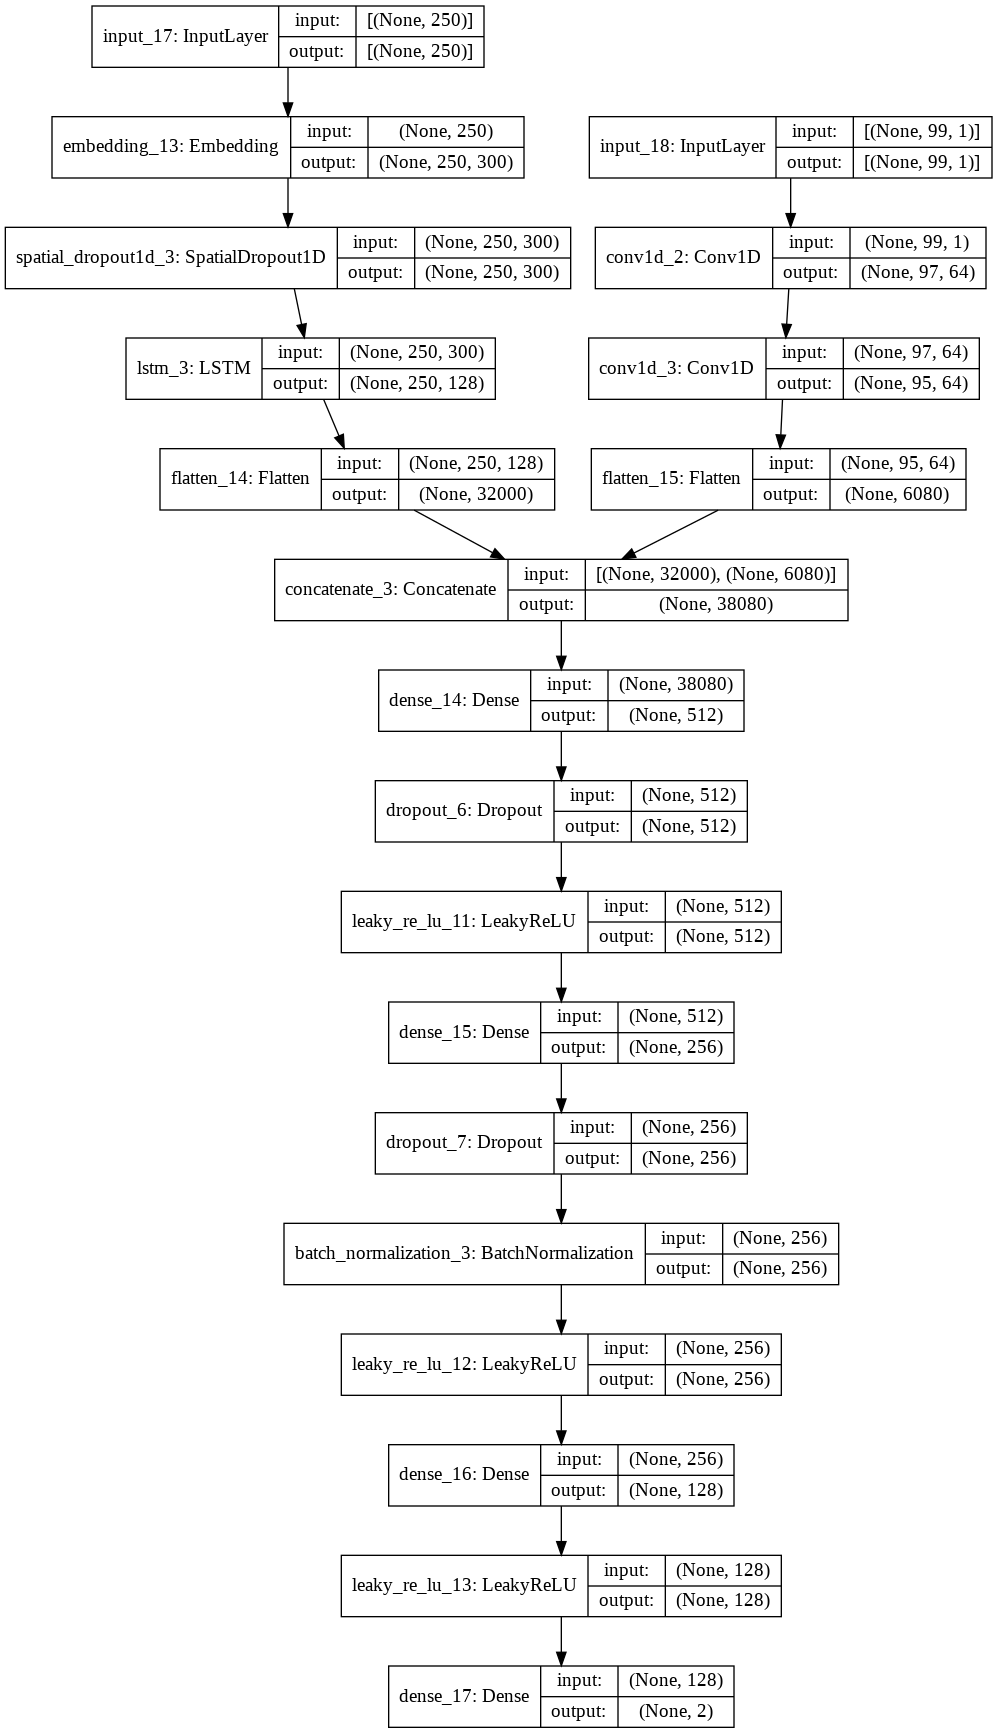

In [121]:
#https://machinelearningmastery.com/visualize-deep-learning-neural-network-model-keras/
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='/content/drive/My Drive/test/model_3.png', show_shapes=True, show_layer_names=True)

In [131]:
# with open('/content/drive/My Drive/LSTM Output/abc.gdoc', 'w') as f:
#   f.write('content')

#model fitting
#https://machinelearningmastery.com/check-point-deep-learning-models-keras/
filepath="/content/drive/My Drive/test/weights_copy_assig_3.best.hdf5"

earlystopping_1 = EarlyStopping(monitor='val_loss', patience=2, verbose=1)

checkpoint = ModelCheckpoint(filepath, monitor='val_auc', verbose=1, save_best_only=True, mode='max')

callbacks_list = [checkpoint,tensorboard, earlystopping_1]

model.fit([X_train_essay, X_train], y_train, nb_epoch=3, verbose=1, batch_size=256, validation_data=([X_cv_essay, X_cv]  , y_cv), callbacks = callbacks_list)


Train on 69918 samples, validate on 17480 samples
Epoch 1/3


ValueError: ignored

In [130]:
type(X_train_essay)

numpy.ndarray

In [ ]:
# Assignment #3 model 2 with optimized weights

# input 1
input1 = Input(batch_shape=(None,250))
x1 = Embedding(input_dim=47268,output_dim= 300,weights=[X_train_essay_mat],trainable = False)(input1)
x1 = SpatialDropout1D(0.3)(x1)
x1 = CuDNNLSTM(256,return_sequences=True)(x1)
x1 = Flatten()(x1)

# input 2
input2 = Input(shape=(99,1))
x2 = Conv1D(filters=64,kernel_size=3,strides=1)(input2)
x2 = Conv1D(filters=64,kernel_size=3,strides=1)(x2)
x2 = Flatten()(x2)

# merging both the inputs
concat = concatenate([x1,x2])
x = Dense(512,kernel_initializer=he_normal(),kernel_regularizer=l2(0.0001))(concat)
x = Dropout(0.4)(x)
x = LeakyReLU()(x)
x = Dense(256,kernel_initializer=he_normal(),kernel_regularizer=l2(0.0001))(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dense(128,kernel_initializer=he_normal(),kernel_regularizer=l2(0.0001))(x)
x = LeakyReLU()(x)
# x = Dropout(0.6)(x)
output = Dense(2, activation = 'softmax')(x)
 
# create model with two inputs
model = Model([input1,input2], output)
model.run_eagerly = True
tensorboard = TensorBoard(log_dir='/content/drive/My Drive/LSTM Output/logs/{}'.format(time()))
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.adam(lr=0.0006,decay = 1e-4), metrics=['accuracy', auc])
model.load_weights(filepath)
# print(model.summary())

In [ ]:
print("Auc for Test data: %0.3f"%roc_auc_score(y_test,model.predict([X_test_essay, X_test])))
print("Auc for CV data: %0.3f"%roc_auc_score(y_cv,model.predict([X_cv_essay, X_cv])))
print("Auc for Train data: %0.3f"%roc_auc_score(y_train,model.predict([X_train_essay, X_train])))

<h1>Assignment 3 Tensor Board Image</h1>

<img src='https://i.imgur.com/mIhsdiX.png'> Ref: https://i.imgur.com/mIhsdiX.png

In [ ]:
# Please compare all your models using Prettytable library
#http://zetcode.com/python/prettytable/
from prettytable import PrettyTable


x = PrettyTable()
x.field_names = ["Features", "Model", "Epochs", "Train AUC", "CV AUC", "Test AUC"]
x.add_row(["Assignment 1 (Embedding Layer Encoding)", "CuDNNLSTM", 50, 0.780, 0.755, 0.761])
x.add_row(["Assignment 2 (TFIDF based essay text + Embedding Layer Encoding)", "CuDNNLSTM", 50, 0.763, 0.744, 0.748])
x.add_row(["Assignment 3 (Essay text + Other features combined)", "CuDNNLSTM+Conv1D", 50, 0.795, 0.750, 0.760])

print(x)

<h1>Conclusion</h1>

- TensorBoard is a nice tools for deep learning model profiling and generating graphs.
- GPUs performance degrades when do CPU intensive work like removing higher or lower tfidf words from sentences but it works best for deep learning stuffs.
- EarlyStopping is very nice feature while training deep learning models